# R notebook for the analysis of the GER 389K project data
Make a **copy** of this notebook to create a notebook that uses R as default. 

Upload your data in the sidebar before starting. This is easier than trying to mount google drive in the R notebook. (Note: each time you open this notebook you will need to re-upload the .csv files)

## Loading data
We will need to convert X (the book ID), the author and filename to the `factor` type for them to be processed correctly; we **don't** want R to read them as numbers or just random strings!

In [ ]:
df.female = read.delim('/content/stylometry_female_authors-v2.csv', sep=',')
df.male = read.delim('/content/stylometry_male_authors-v2.csv', sep=',')

head(df.female)
head(df.male)

,X,author,filename,TTR,mean_word_len,mean_sent_len,std_sent_len,mean_p_len,doc_len,commas,⋯,obwohl,wenn,dass,mehr,sagen,rufen,flüstern,vielleicht,dies,sehr
,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,13732,"Dehmel, Paula, 1862-1918",13732,16.403255,4.589993,8.311396,8.627998,24.85670,150119,80.73362,⋯,0.0000000,1.061509,0.8551041,0.4128089,1.120481,0.2064044,0.08845904,0.1769181,0.5012679,0.4422952
2,40012,"Ebner-Eschenbach, Marie von, 1830-1916",40012,11.984430,4.977789,12.953483,11.223339,37.41672,367415,74.10320,⋯,0.1048507,1.730036,2.5950537,1.2582078,1.887312,0.8125926,0.03931900,0.3145520,2.4246714,0.7339546
3,48064,"Helm, Clementine, 1825-1896",48064,8.870510,4.902311,18.066528,13.265064,60.84554,430942,77.32625,⋯,0.2836204,1.281964,3.7551335,1.4181018,3.584961,1.4407914,0.06806889,0.1361378,4.1068228,1.9513081
4,56098,"Helm, Clementine, 1825-1896",56098,7.578189,4.896664,16.765531,11.765940,80.50993,556040,73.48467,⋯,0.2542722,1.797441,4.1648035,1.2099850,3.480899,1.8149775,0.03507203,0.3331843,4.8487080,1.4028812
5,57412,"Olfers, Sibylle, 1881-1916",57412,25.606343,5.015584,9.453552,11.121867,36.79787,22116,41.27799,⋯,0.0000000,0.000000,0.0000000,0.0000000,0.000000,0.0000000,0.00000000,0.0000000,0.0000000,0.2332090
6,57677,"Olfers, Sibylle, 1881-1916",57677,25.208333,5.009514,8.209524,10.746601,39.54023,22283,40.27778,⋯,0.0000000,0.462963,0.0000000,0.0000000,0.000000,0.0000000,0.00000000,0.0000000,0.2314815,0.2314815


,X,author,filename,TTR,mean_word_len,mean_sent_len,std_sent_len,mean_p_len,doc_len,commas,⋯,obwohl,wenn,dass,mehr,sagen,rufen,flüstern,vielleicht,dies,sehr
,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,31204,"Bassewitz, Gerdt von, 1878-1923",31204,12.61382,4.777256,7.013588,7.104376,12.96339,137207,62.52596,⋯,0,1.086297,0.6389981,0.6709480,1.086297,0.2236493,0.00000000,0.0319499,0.4792485,1.5335953
2,34265,"Bonsels, Waldemar, 1881?-1952",34265,12.94644,4.907992,17.633052,13.766532,61.27390,209231,75.37737,⋯,0,1.435304,4.5929718,1.6027558,1.530991,0.4545128,0.04784346,0.2631390,3.3968854,0.3827476
3,21021,"Bonsels, Waldemar, 1881?-1952",21021,10.02871,4.788239,12.702430,10.004297,35.21536,245212,71.02797,⋯,0,1.806118,4.7529421,1.0076237,5.399342,1.7110591,0.19011768,0.4562824,2.3764710,1.5019297
4,2322,"Busch, Wilhelm, 1832-1908",2322,30.66320,4.643543,6.921376,8.156860,20.63235,17260,48.11443,⋯,0,0.000000,0.5201560,0.0000000,0.000000,0.2600780,0.00000000,0.0000000,2.0806242,1.3003901
5,54960,"Busch, Wilhelm, 1832-1908",54960,26.03088,5.086482,7.323481,8.948060,15.38062,29605,41.40506,⋯,0,0.000000,1.0181571,0.1696929,0.000000,0.0000000,0.00000000,0.0000000,0.5090786,0.3393857
6,17161,"Busch, Wilhelm, 1832-1908",17161,22.54077,4.752072,8.473373,9.449220,20.15901,36035,46.89093,⋯,0,0.127421,0.1274210,0.0000000,0.254842,0.1274210,0.00000000,0.0000000,1.9113150,0.0000000


## Descriptive features (mean) 

### female authors

Use this script to find the **mean**, the average value, for each list of features for the list of female authors:

In [ ]:
sum(df.female$mean_sent_len) / length(df.female$mean_sent_len)

[1] 13.48714

In [ ]:
sum(df.female$mean_word_len) / length(df.female$mean_word_len)

[1] 4.856887

In [ ]:
sum(df.female$std_sent_len) / length(df.female$std_sent_len)

[1] 11.71113

In [ ]:
sum(df.female$mean_p_len) / length(df.female$mean_p_len)

[1] 51.14296

In [ ]:
sum(df.female$doc_len) / length(df.female$doc_len)

[1] 286722.3

In [ ]:
sum(df.female$commas) / length(df.female$commas)

[1] 64.59017

In [ ]:
sum(df.female$obwohl) / length(df.female$obwohl)

[1] 0.06918419

In [ ]:
sum(df.female$wenn) / length(df.female$wenn)

[1] 1.67766

In [ ]:
sum(df.female$dass) / length(df.female$dass)

[1] 0.4589742

In [ ]:
sum(df.female$mehr) / length(df.female$mehr)

[1] 1.22745

In [ ]:
sum(df.female$sagen) / length(df.female$sagen)

[1] 2.995331

In [ ]:
sum(df.female$rufen) / length(df.female$rufen)

[1] 0.9077904

In [ ]:
sum(df.female$flüstern) / length(df.female$flüstern)

[1] 0.06339915

In [ ]:
sum(df.female$vielleicht) / length(df.female$vielleicht)

[1] 0.2529663

In [ ]:
sum(df.female$dies) / length(df.female$dies)

[1] 2.44525

In [ ]:
sum(df.female$sehr) / length(df.female$sehr)

[1] 0.8028087

### male authors

And to find the mean, the average value, for each list of features for the list of male authors:

In [ ]:
sum(df.male$mean_sent_len) / length(df.male$mean_sent_len)

[1] 47.84052

In [ ]:
sum(df.male$mean_word_len) / length(df.male$mean_word_len)

[1] 4.881048

In [ ]:
sum(df.male$std_sent_len) / length(df.male$std_sent_len)

[1] 10.67375

In [ ]:
sum(df.male$mean_p_len) / length(df.male$mean_p_len)

[1] 47.84052

In [ ]:
sum(df.male$doc_len) / length(df.male$doc_len)

[1] 222716.8

In [ ]:
sum(df.male$commas) / length(df.male$commas)

[1] 58.35276

In [ ]:
sum(df.male$obwohl) / length(df.male$obwohl)

[1] 0.05432838

In [ ]:
sum(df.male$wenn) / length(df.male$wenn)

[1] 1.309686

In [ ]:
sum(df.male$dass) / length(df.male$dass)

[1] 0

In [ ]:
sum(df.male$mehr) / length(df.male$mehr)

[1] 0.8050187

In [ ]:
sum(df.male$sagen) / length(df.male$sagen)

[1] 2.0921

In [ ]:
sum(df.male$rufen) / length(df.male$rufen)

[1] 0.7796137

In [ ]:
sum(df.male$flüstern) / length(df.male$flüstern)

[1] 0.06761348

In [ ]:
sum(df.male$vielleicht) / length(df.male$vielleicht)

[1] 0.1803055

In [ ]:
sum(df.male$dies) / length(df.male$dies)

[1] 2.383786

In [ ]:
sum(df.male$sehr) / length(df.male$sehr)

[1] 1.065133

## Descriptive features (standard deviation)

For an analysis such as ours, we also need to find the standard deviation between all of the authors in the "female" group (or in the "male" group). One very common way to normalize the variable is to make use of 𝑧 -scores. To convert a vector of values into their 𝑧 -scores, two operations are required, that each come with their own benefits: centering and scaling (also called standardization). Centering is the easiest operation of the two: you just need to subtract the mean value from every value:

## female authors

To find the standard deviation for each feature

In [ ]:
sd(df.female$TTR)

[1] 6.715093

In [ ]:
sd(df.female$mean_word_len)

[1] 0.154974

In [ ]:
sd(df.female$mean_sent_len)

[1] 3.336374

In [ ]:
sd(df.female$std_sent_len)

[1] 2.240174

In [ ]:
sd(df.female$mean_p_len)

[1] 16.7602

In [ ]:
sd(df.female$doc_len)

[1] 178435.9

In [ ]:
sd(df.female$commas)

[1] 12.86975

In [ ]:
sd(df.female$semicolons)

[1] 2.973146

In [ ]:
sd(df.female$quotations)

[1] 12.83049

In [ ]:
sd(df.female$exclamations)

[1] 2.818287

In [ ]:
sd(df.female$colons)

[1] 1.382502

In [ ]:
sd(df.female$hyphens)

[1] 0.5581375

In [ ]:
sd(df.female$double_hyphens)

[1] 1.901334

In [ ]:
sd(df.female$und)

[1] 9.821518

In [ ]:
sd(df.female$aber)

[1] 2.373122

In [ ]:
sd(df.female$obwohl)

[1] 0.08301348

In [ ]:
sd(df.female$wenn)

[1] 0.9458077

In [ ]:
sd(df.female$dass)

[1] 2.244312

In [ ]:
sd(df.female$mehr)

[1] 0.8001749

In [ ]:
sd(df.female$sagen)

[1] 2.225364

In [ ]:
sd(df.female$rufen)

[1] 0.6388688

In [ ]:
sd(df.female$`flüstern`)

[1] 0.06914936

In [ ]:
sd(df.female$vielleicht)

[1] 0.1773938

In [ ]:
sd(df.female$dies)

[1] 1.743677

In [ ]:
sd(df.female$sehr)

[1] 0.5947406

###This is a different approach

In [ ]:
centered <- df.female$TTR - mean(df.female$TTR)

By centering the mean, it makes the mean of your values identical to zero:

In [ ]:
mean(centered)

[1] -4.841061e-16

To get the actual z-score, we divide the centered values by the standard deviation (of the original values):

In [ ]:
head(df.female$TTR - mean(df.female$TTR) / sd(df.female$TTR))

[1] 14.502851 10.084025  6.970106  5.677784 23.705939 23.307929

We are interested in how far from the mean each value for each text is.
The only drawback of converting values to 𝑧 -scores has to do with interpretation. The units in which 𝑧 -scores are expressed no longer correspond to a measure in the outside, physical world. The unit of expression now has become the standard deviation, which is much harder to interpret intuitively.

Finally, one classic application of z-scores is to remove outliers. If a value is, let's say, 10 (!) standard deviations removed from the mean (in absolute terms), you could use that as a formal argument that the data point is an **outlier**. Removing such outliers could then proceed as follows:

In [ ]:
z <- scale(df.female$TTR)
mask = abs(z) < 10 
length(z)
z <- z[mask, ]
length(z)

[1] 22

[1] 22

## male authors

To find the standard deviation for each feature

In [ ]:
sd(df.male$TTR)
sd(df.male$mean_word_len)
sd(df.male$mean_sent_len)
sd(df.male$std_sent_len)
sd(df.male$mean_p_len)
sd(df.male$doc_len)
sd(df.male$commas)
sd(df.male$semicolons)
sd(df.male$quotations)
sd(df.male$exclamations)
sd(df.male$colons)
sd(df.male$hyphens)
sd(df.male$double_hyphens)
sd(df.male$und)
sd(df.male$aber)
sd(df.male$obwohl)
sd(df.male$wenn)
sd(df.male$dass)
sd(df.male$mehr)
sd(df.male$sagen)
sd(df.male$rufen)
sd(df.male$`flüstern`)
sd(df.male$vielleicht)
sd(df.male$dies)
sd(df.male$sehr)

[1] 6.247223

[1] 0.1870974

[1] 3.711568

[1] 2.241333

[1] 25.81943

[1] 223788.9

[1] 15.16678

[1] 2.438653

[1] 8.006714

[1] 4.542559

[1] 3.123482

[1] 0.5722515

[1] 3.786348

[1] 7.026661

[1] 1.756509

[1] 0.0904387

[1] 0.9458429

[1] 1.818857

[1] 0.4544004

[1] 1.673581

[1] 0.4369703

[1] 0.09505739

[1] 0.156316

[1] 1.238769

[1] 0.7797616

### again, a different approach

In [ ]:
centered <- df.male$TTR - mean(df.male$TTR)

In [ ]:
mean(centered)

[1] -1.534146e-15

In [ ]:
head(df.male$TTR - mean(df.male$TTR) / sd(df.male$TTR))

[1] 10.008376 10.340994  7.423263 28.057754 23.425439 19.935330

In [ ]:
z <- scale(df.male$TTR)
mask = abs(z) < 10 
length(z)
z <- z[mask, ]
length(z)

[1] 22

[1] 22

# To create summary of the features (aka what everything we did above)

In [ ]:
summary(df.female)

       X            author             filename          TTR        
 Min.   : 7500   Length:22          Min.   : 7500   Min.   : 6.630  
 1st Qu.:12489   Class :character   1st Qu.:12489   1st Qu.: 7.783  
 Median :35660   Mode  :character   Median :35660   Median : 9.378  
 Mean   :35710                      Mean   :35710   Mean   :12.761  
 3rd Qu.:57452                      3rd Qu.:57452   3rd Qu.:15.974  
 Max.   :67217                      Max.   :67217   Max.   :25.729  
 mean_word_len   mean_sent_len    std_sent_len      mean_p_len   
 Min.   :4.590   Min.   : 8.21   Min.   : 8.628   Min.   :24.86  
 1st Qu.:4.741   1st Qu.:11.35   1st Qu.:10.351   1st Qu.:37.95  
 Median :4.892   Median :13.89   Median :11.173   Median :49.57  
 Mean   :4.857   Mean   :13.49   Mean   :11.711   Mean   :51.14  
 3rd Qu.:4.996   3rd Qu.:15.80   3rd Qu.:12.876   3rd Qu.:58.66  
 Max.   :5.083   Max.   :19.95   Max.   :17.133   Max.   :96.43  
    doc_len           commas        semicolons        q

In [ ]:
summary(df.male)

       X            author             filename          TTR        
 Min.   : 2322   Length:22          Min.   : 2322   Min.   : 6.018  
 1st Qu.:28863   Class :character   1st Qu.:28863   1st Qu.:12.697  
 Median :43622   Mode  :character   Median :43622   Median :14.583  
 Mean   :39009                      Mean   :39009   Mean   :16.277  
 3rd Qu.:51896                      3rd Qu.:51896   3rd Qu.:21.548  
 Max.   :61354                      Max.   :61354   Max.   :30.663  
 mean_word_len   mean_sent_len     std_sent_len      mean_p_len    
 Min.   :4.462   Min.   : 6.593   Min.   : 7.104   Min.   : 12.96  
 1st Qu.:4.780   1st Qu.: 8.497   1st Qu.: 9.155   1st Qu.: 29.26  
 Median :4.870   Median :12.123   Median :10.098   Median : 43.43  
 Mean   :4.881   Mean   :11.622   Mean   :10.674   Mean   : 47.84  
 3rd Qu.:5.022   3rd Qu.:13.220   3rd Qu.:11.794   3rd Qu.: 65.67  
 Max.   :5.269   Max.   :18.949   Max.   :16.278   Max.   :101.55  
    doc_len           commas         semi

# Exploring how to test for correlations in R 
This is just an exercise with R syntax and not meant as analysis yet

In [ ]:
cor.test(df.female$doc_len,df.female$mean_sent_len)


	Pearson's product-moment correlation

data:  df.female$doc_len and df.female$mean_sent_len
t = 5.4888, df = 20, p-value = 2.259e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5253532 0.9020282
sample estimates:
      cor 
0.7752491 


In [ ]:
cor.test(df.male$doc_len,df.male$mean_sent_len)


	Pearson's product-moment correlation

data:  df.male$doc_len and df.male$mean_sent_len
t = 4.0005, df = 20, p-value = 0.0007027
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3409436 0.8495276
sample estimates:
      cor 
0.6667153 


Correlations and other statisticals have assumptions though. We can test some of them with the following functions:

In [ ]:
shapiro.test(df.female$mean_sent_len)


	Shapiro-Wilk normality test

data:  df.female$mean_sent_len
W = 0.95968, p-value = 0.4829


In [ ]:
shapiro.test(df.male$mean_sent_len)


	Shapiro-Wilk normality test

data:  df.male$mean_sent_len
W = 0.93239, p-value = 0.1376


In [ ]:
 var.test(df.female$mean_sent_len,df.male$mean_sent_len)


	F test to compare two variances

data:  df.female$mean_sent_len and df.male$mean_sent_len
F = 0.80804, num df = 21, denom df = 21, p-value = 0.6297
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.3354839 1.9462438
sample estimates:
ratio of variances 
          0.808043 


In [ ]:
wilcox.test(df.female$mean_sent_len,df.male$mean_sent_len)


	Wilcoxon rank sum exact test

data:  df.female$mean_sent_len and df.male$mean_sent_len
W = 327, p-value = 0.04657
alternative hypothesis: true location shift is not equal to 0


barely significant, but signficant (female authors have longer sentences than male authors)

In [ ]:
wilcox.test(df.female$dass,df.male$dass)

Warning message in wilcox.test.default(df.female$dass, df.male$dass):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  df.female$dass and df.male$dass
W = 244, p-value = 0.9719
alternative hypothesis: true location shift is not equal to 0


# Generating plots for the distribution of all features and comparing their means
Goal: establish whether there is a significant difference between male and female authors according to each feature.

We are using the non-parametric Wilcoxon test because it does not require the assumptions that the T-test does.

In [ ]:
# Reloading the data so we have the updated version with daß instead of dass
df.female = read.delim('/content/stylometry_female_authors-v2.csv', sep=',')
df.male = read.delim('/content/stylometry_male_authors-v2.csv', sep=',')

head(df.female)
head(df.male)

,X,author,filename,TTR,mean_word_len,mean_sent_len,std_sent_len,mean_p_len,doc_len,commas,⋯,obwohl,wenn,dass,mehr,sagen,rufen,flüstern,vielleicht,dies,sehr
,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,13732,"Dehmel, Paula, 1862-1918",13732,16.403255,4.589993,8.311396,8.627998,24.85670,150119,80.73362,⋯,0.0000000,1.061509,0.8551041,0.4128089,1.120481,0.2064044,0.08845904,0.1769181,0.5012679,0.4422952
2,40012,"Ebner-Eschenbach, Marie von, 1830-1916",40012,11.984430,4.977789,12.953483,11.223339,37.41672,367415,74.10320,⋯,0.1048507,1.730036,2.5950537,1.2582078,1.887312,0.8125926,0.03931900,0.3145520,2.4246714,0.7339546
3,48064,"Helm, Clementine, 1825-1896",48064,8.870510,4.902311,18.066528,13.265064,60.84554,430942,77.32625,⋯,0.2836204,1.281964,3.7551335,1.4181018,3.584961,1.4407914,0.06806889,0.1361378,4.1068228,1.9513081
4,56098,"Helm, Clementine, 1825-1896",56098,7.578189,4.896664,16.765531,11.765940,80.50993,556040,73.48467,⋯,0.2542722,1.797441,4.1648035,1.2099850,3.480899,1.8149775,0.03507203,0.3331843,4.8487080,1.4028812
5,57412,"Olfers, Sibylle, 1881-1916",57412,25.606343,5.015584,9.453552,11.121867,36.79787,22116,41.27799,⋯,0.0000000,0.000000,0.0000000,0.0000000,0.000000,0.0000000,0.00000000,0.0000000,0.0000000,0.2332090
6,57677,"Olfers, Sibylle, 1881-1916",57677,25.208333,5.009514,8.209524,10.746601,39.54023,22283,40.27778,⋯,0.0000000,0.462963,0.0000000,0.0000000,0.000000,0.0000000,0.00000000,0.0000000,0.2314815,0.2314815


,X,author,filename,TTR,mean_word_len,mean_sent_len,std_sent_len,mean_p_len,doc_len,commas,⋯,obwohl,wenn,dass,mehr,sagen,rufen,flüstern,vielleicht,dies,sehr
,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,31204,"Bassewitz, Gerdt von, 1878-1923",31204,12.61382,4.777256,7.013588,7.104376,12.96339,137207,62.52596,⋯,0,1.086297,0.6389981,0.6709480,1.086297,0.2236493,0.00000000,0.0319499,0.4792485,1.5335953
2,34265,"Bonsels, Waldemar, 1881?-1952",34265,12.94644,4.907992,17.633052,13.766532,61.27390,209231,75.37737,⋯,0,1.435304,4.5929718,1.6027558,1.530991,0.4545128,0.04784346,0.2631390,3.3968854,0.3827476
3,21021,"Bonsels, Waldemar, 1881?-1952",21021,10.02871,4.788239,12.702430,10.004297,35.21536,245212,71.02797,⋯,0,1.806118,4.7529421,1.0076237,5.399342,1.7110591,0.19011768,0.4562824,2.3764710,1.5019297
4,2322,"Busch, Wilhelm, 1832-1908",2322,30.66320,4.643543,6.921376,8.156860,20.63235,17260,48.11443,⋯,0,0.000000,0.5201560,0.0000000,0.000000,0.2600780,0.00000000,0.0000000,2.0806242,1.3003901
5,54960,"Busch, Wilhelm, 1832-1908",54960,26.03088,5.086482,7.323481,8.948060,15.38062,29605,41.40506,⋯,0,0.000000,1.0181571,0.1696929,0.000000,0.0000000,0.00000000,0.0000000,0.5090786,0.3393857
6,17161,"Busch, Wilhelm, 1832-1908",17161,22.54077,4.752072,8.473373,9.449220,20.15901,36035,46.89093,⋯,0,0.127421,0.1274210,0.0000000,0.254842,0.1274210,0.00000000,0.0000000,1.9113150,0.0000000


We need R to know that certain features are categorical variables or unique values so it interprets them correctly. We convert them into factors for this purpose:

In [ ]:
df.female$X <- as.factor(df.female$X)
df.female$author <- as.factor(df.female$author)
df.female$filename <- as.factor(df.female$filename)
df.male$X <- as.factor(df.male$X)
df.male$author <- as.factor(df.male$author)
df.male$filename <- as.factor(df.male$filename)

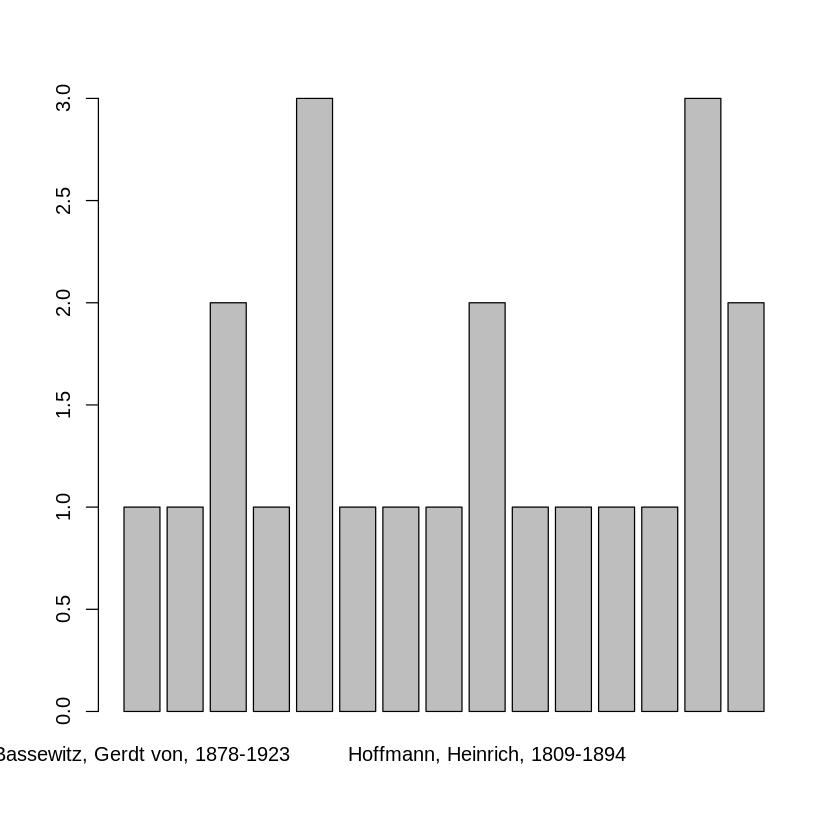

In [ ]:
plot(df.male$author)

Inefficient/dirty coding but does the trick right now: we now plot all our variables and run our tests to check whether they are indeed statistically different

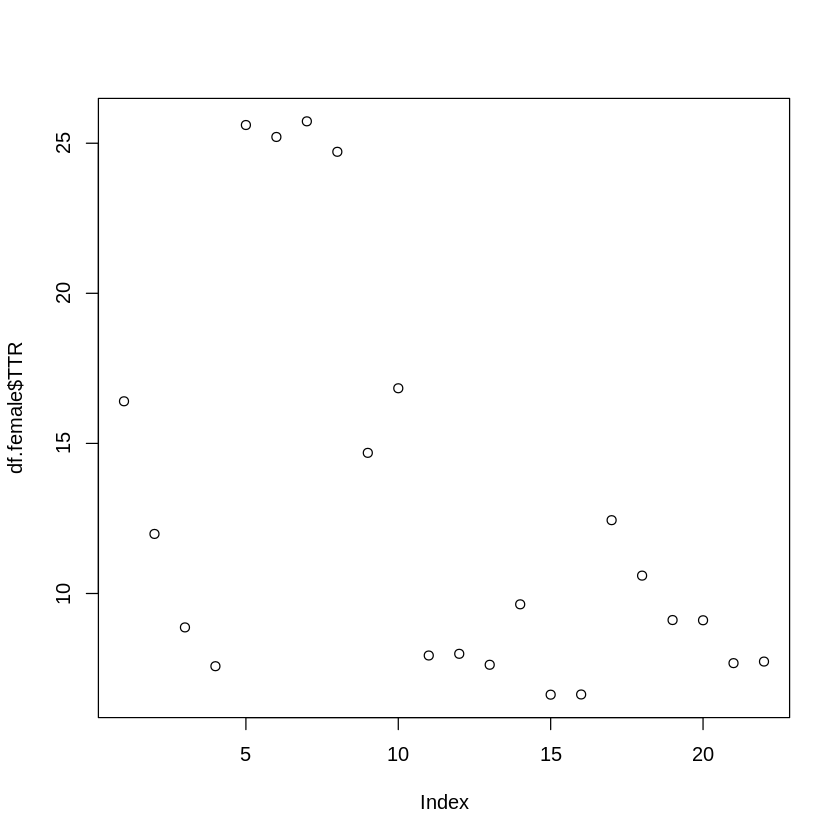


	Wilcoxon rank sum exact test

data:  df.female$TTR and df.male$TTR
W = 147, p-value = 0.02549
alternative hypothesis: true location shift is not equal to 0


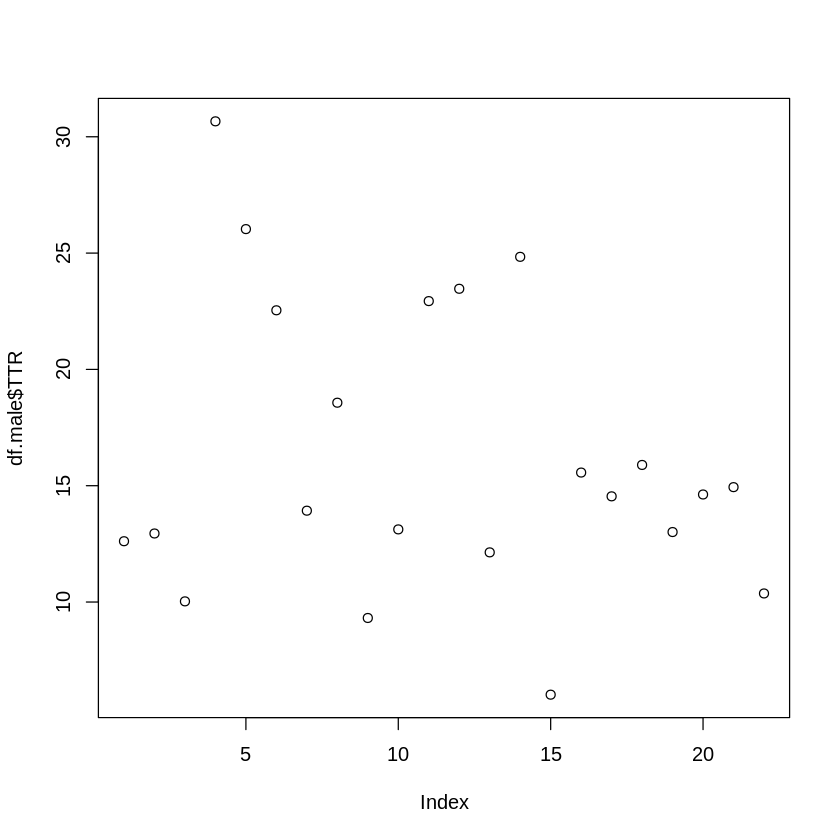

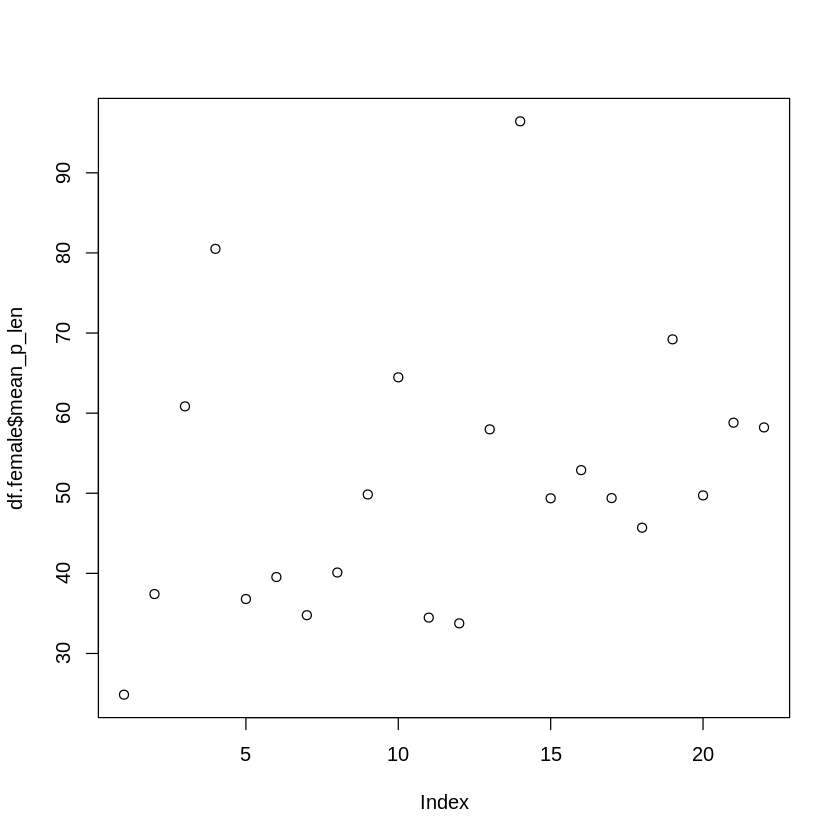


	Wilcoxon rank sum exact test

data:  df.female$mean_p_len and df.male$mean_p_len
W = 281, p-value = 0.3698
alternative hypothesis: true location shift is not equal to 0


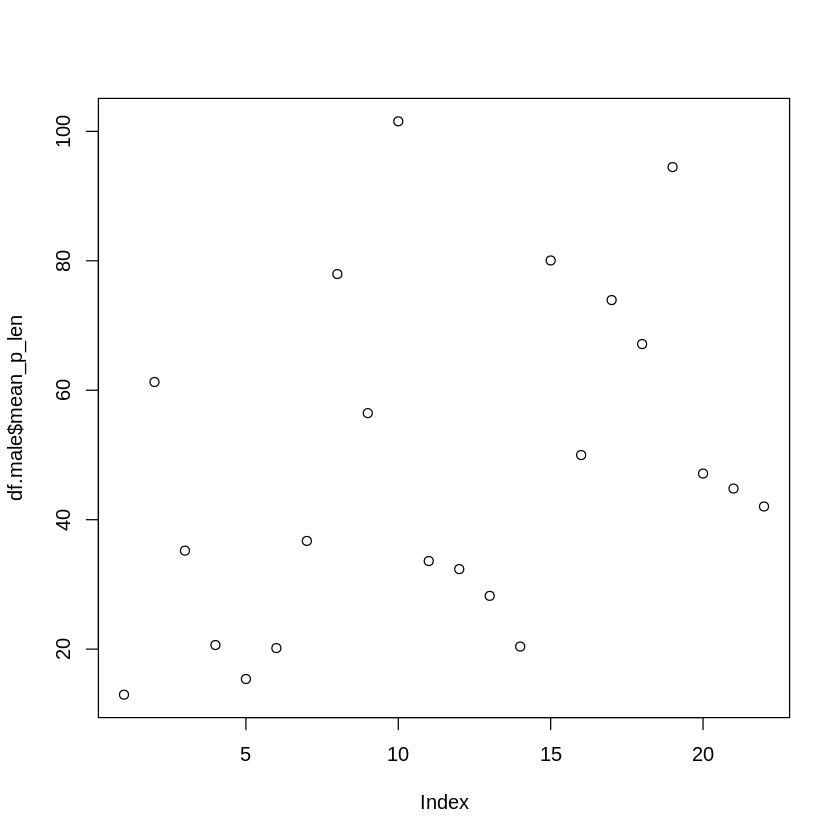

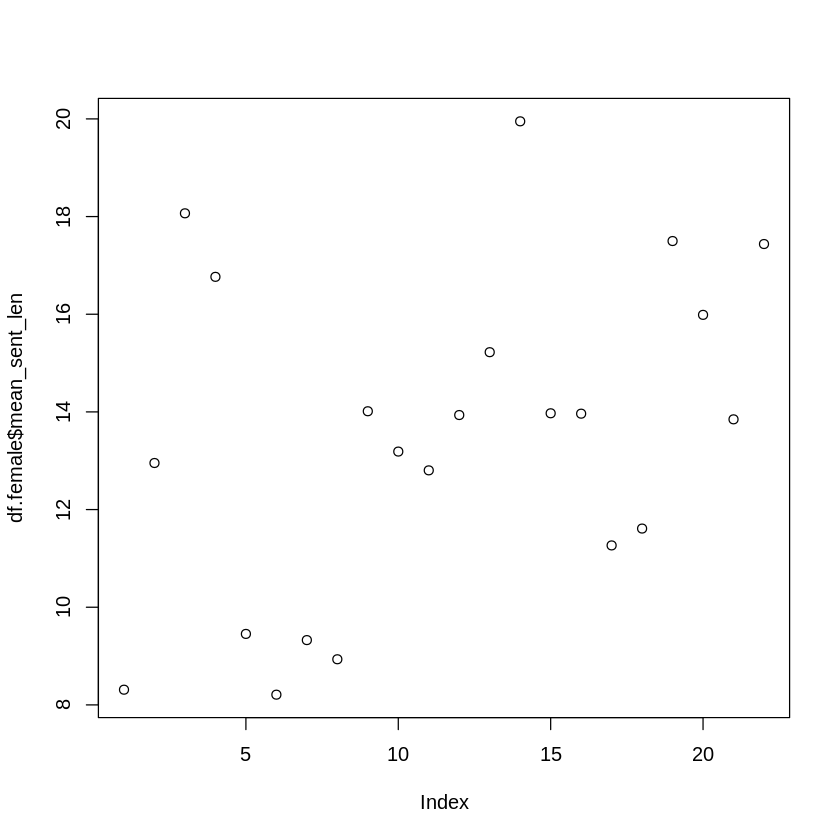


	Wilcoxon rank sum exact test

data:  df.female$mean_sent_len and df.male$mean_sent_len
W = 327, p-value = 0.04657
alternative hypothesis: true location shift is not equal to 0


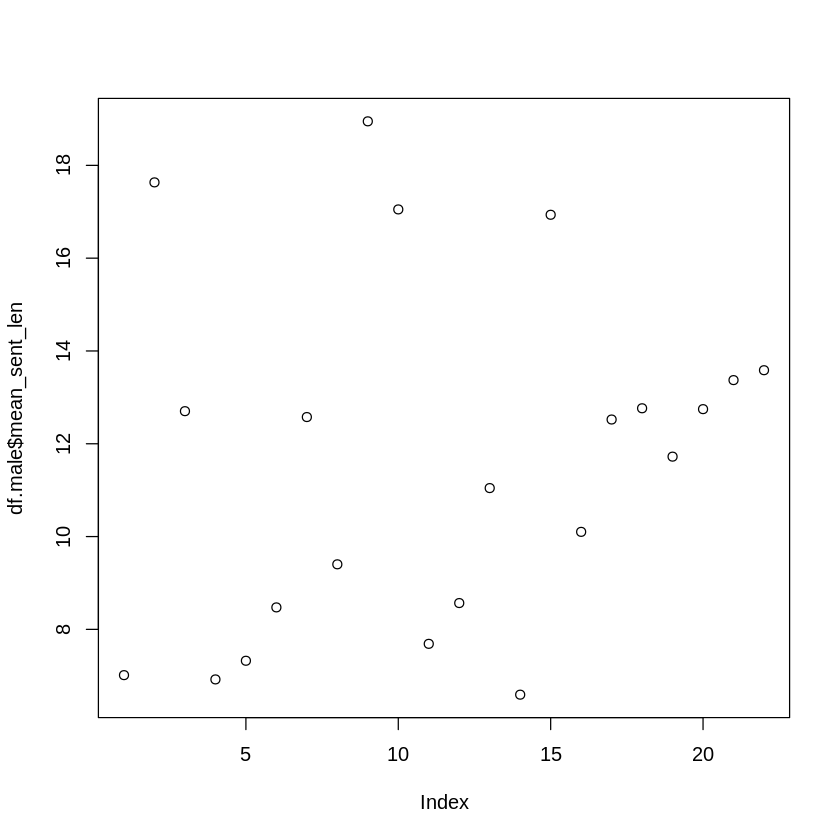

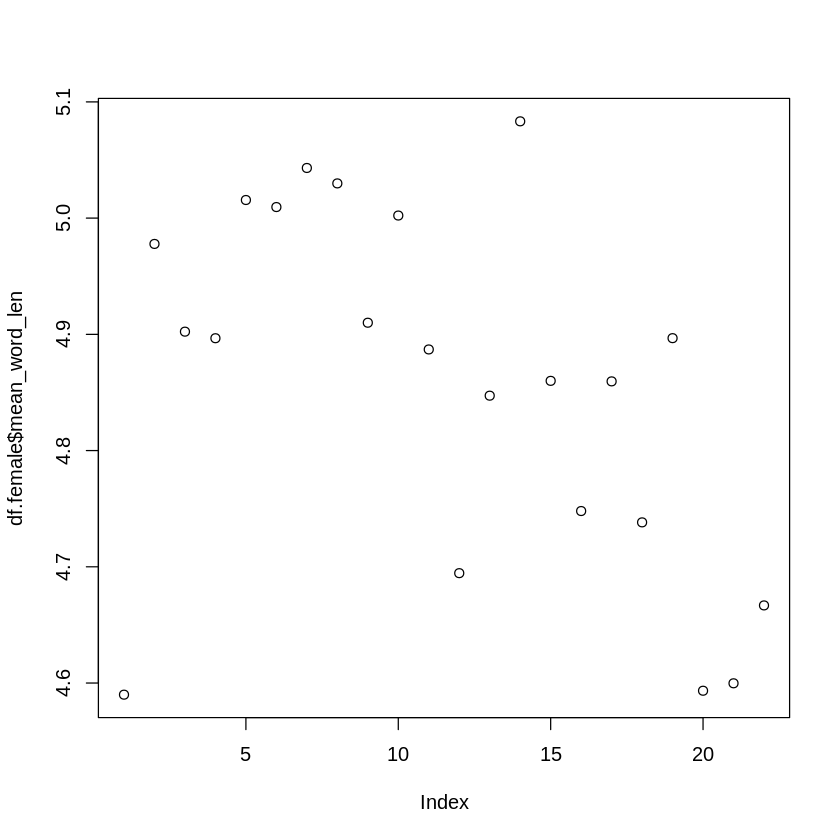


	Wilcoxon rank sum exact test

data:  df.female$mean_word_len and df.male$mean_word_len
W = 224, p-value = 0.6842
alternative hypothesis: true location shift is not equal to 0


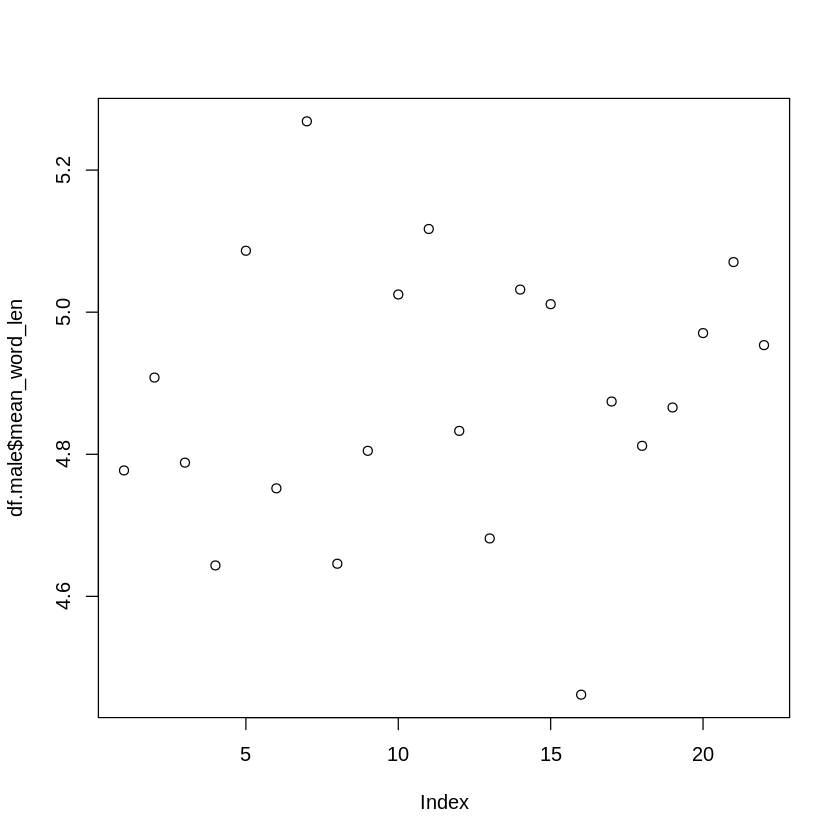

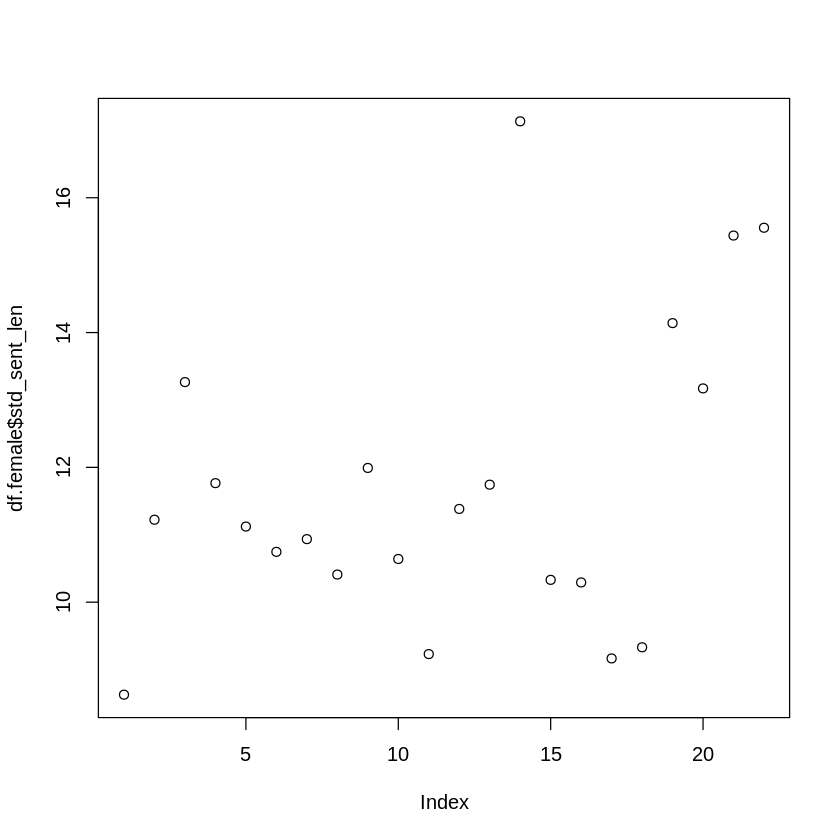


	Wilcoxon rank sum exact test

data:  df.female$std_sent_len and df.male$std_sent_len
W = 306, p-value = 0.1372
alternative hypothesis: true location shift is not equal to 0


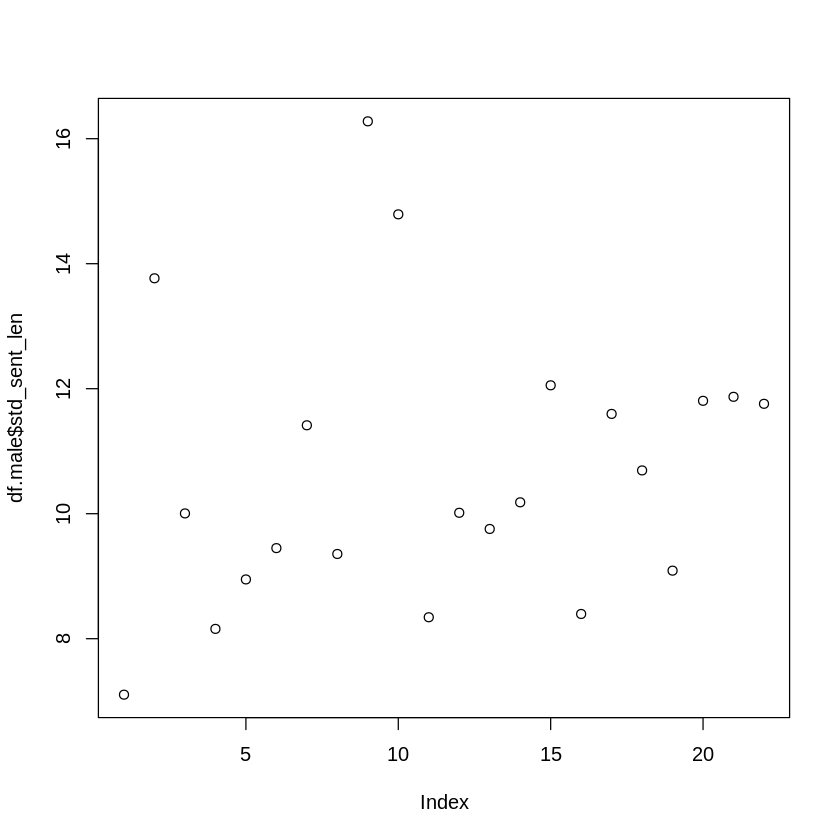

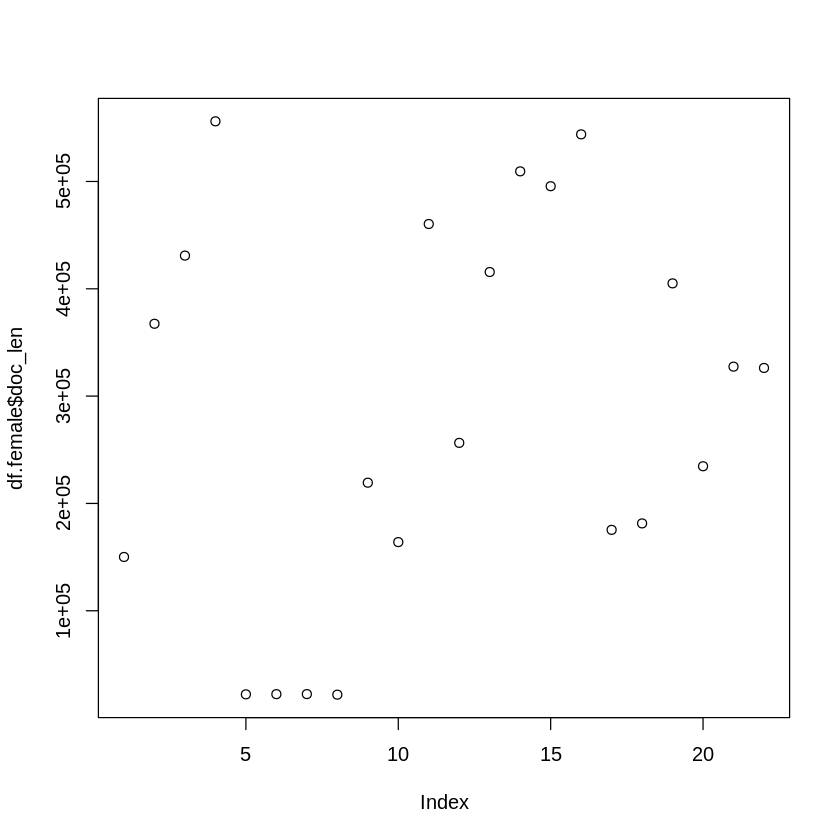


	Wilcoxon rank sum exact test

data:  df.female$doc_len and df.male$doc_len
W = 306, p-value = 0.1372
alternative hypothesis: true location shift is not equal to 0


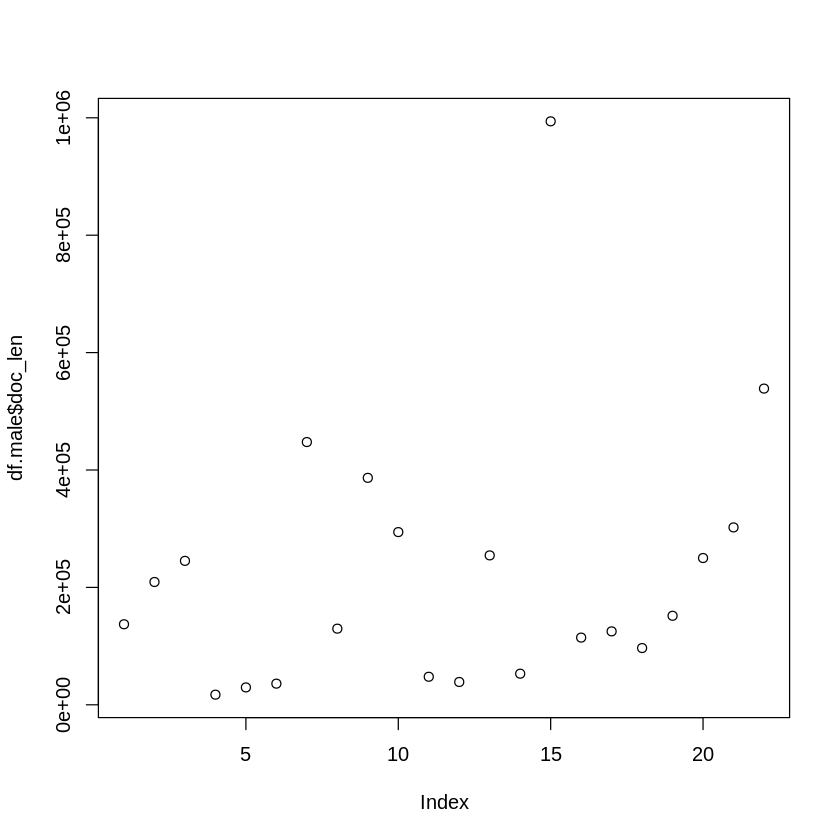

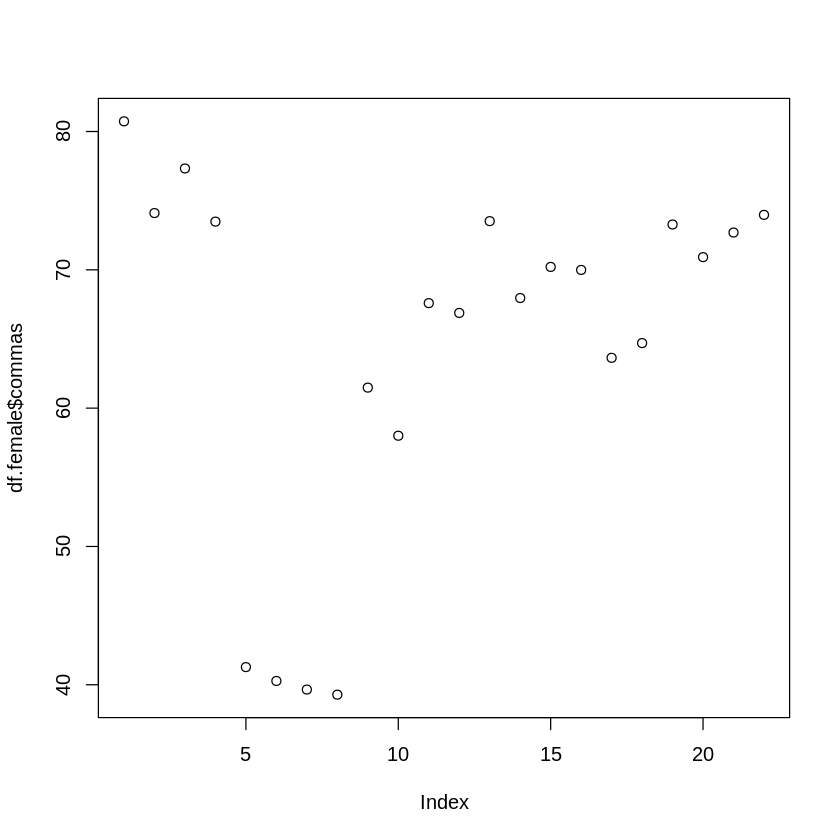


	Wilcoxon rank sum exact test

data:  df.female$commas and df.male$commas
W = 318, p-value = 0.07621
alternative hypothesis: true location shift is not equal to 0


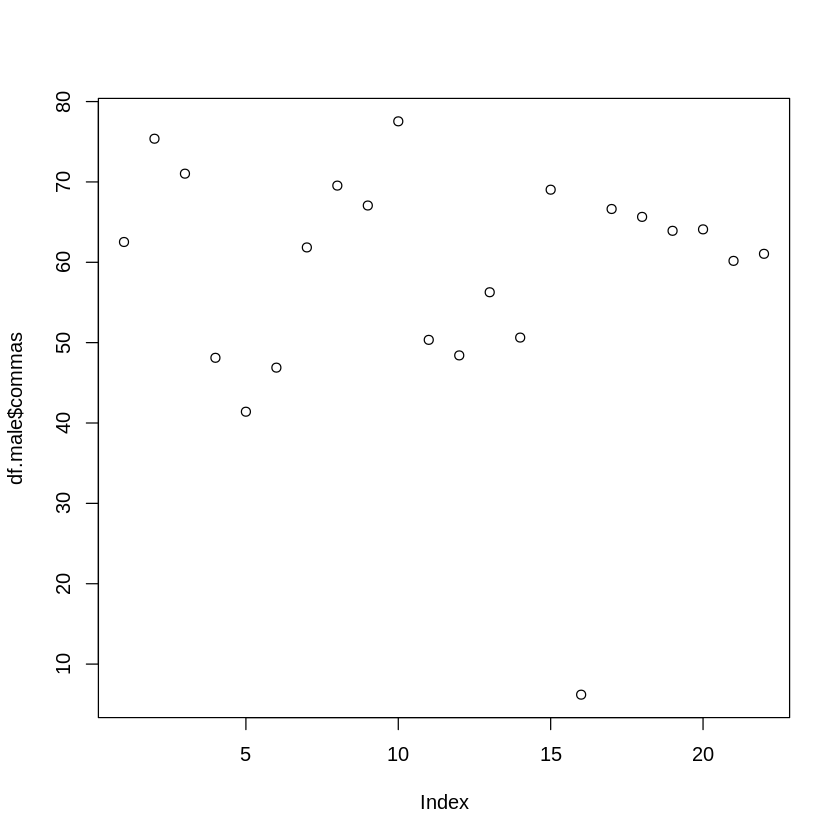

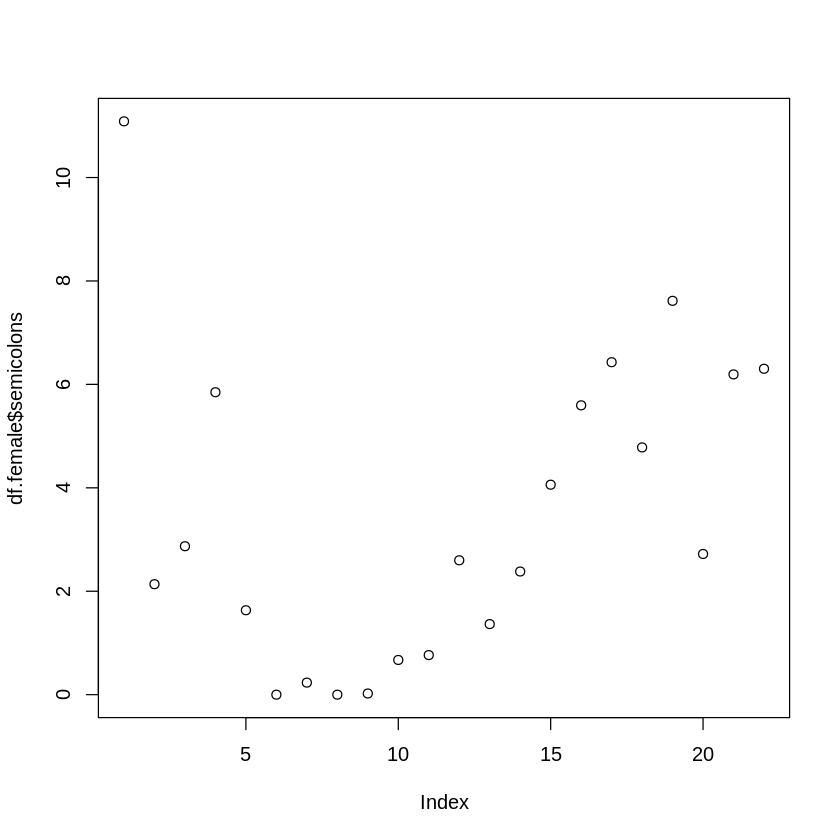

Warning message in wilcox.test.default(df.female$semicolons, df.male$semicolons):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  df.female$semicolons and df.male$semicolons
W = 224, p-value = 0.6812
alternative hypothesis: true location shift is not equal to 0


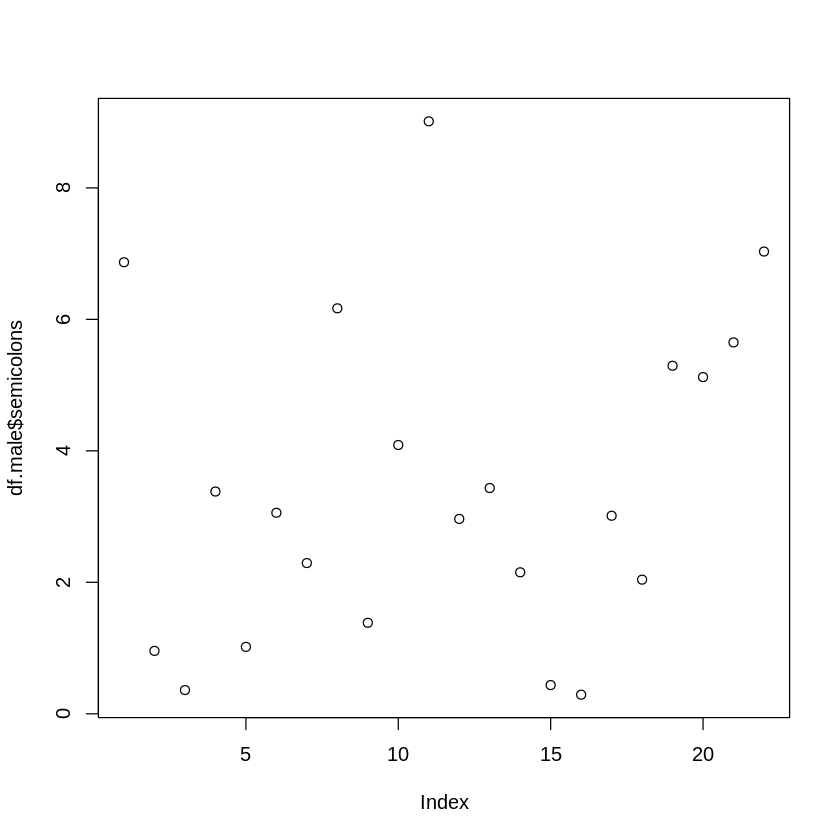

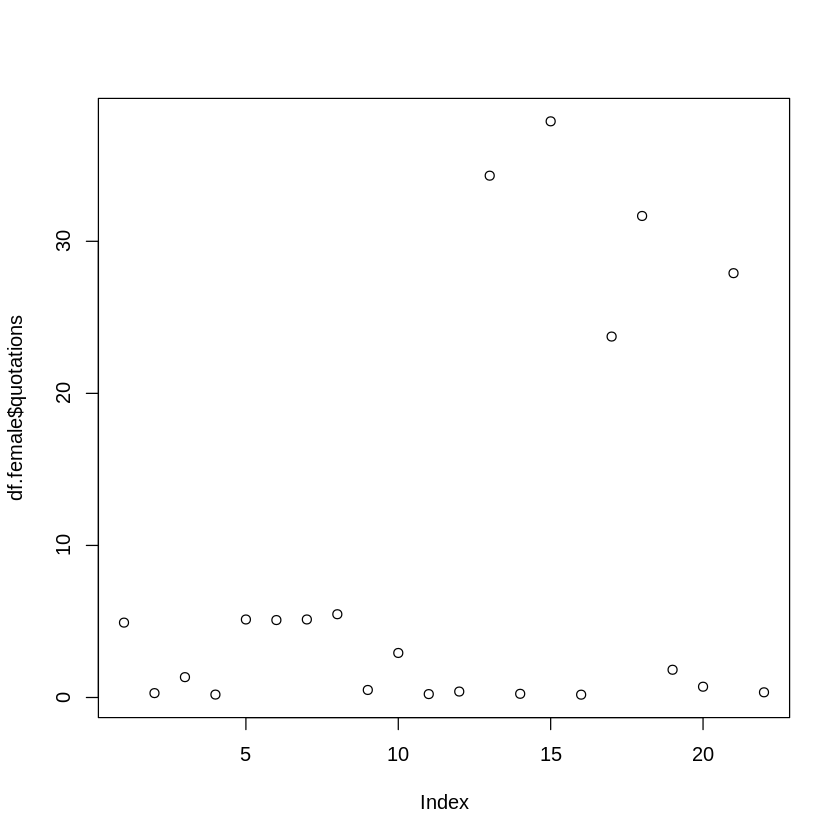


	Wilcoxon rank sum exact test

data:  df.female$quotations and df.male$quotations
W = 281, p-value = 0.3698
alternative hypothesis: true location shift is not equal to 0


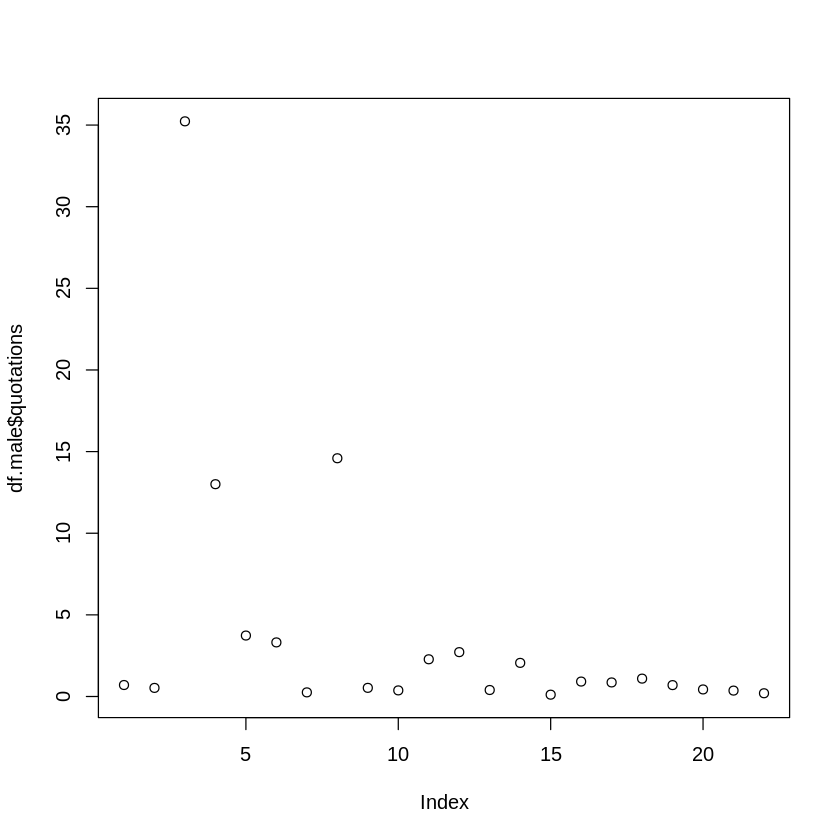

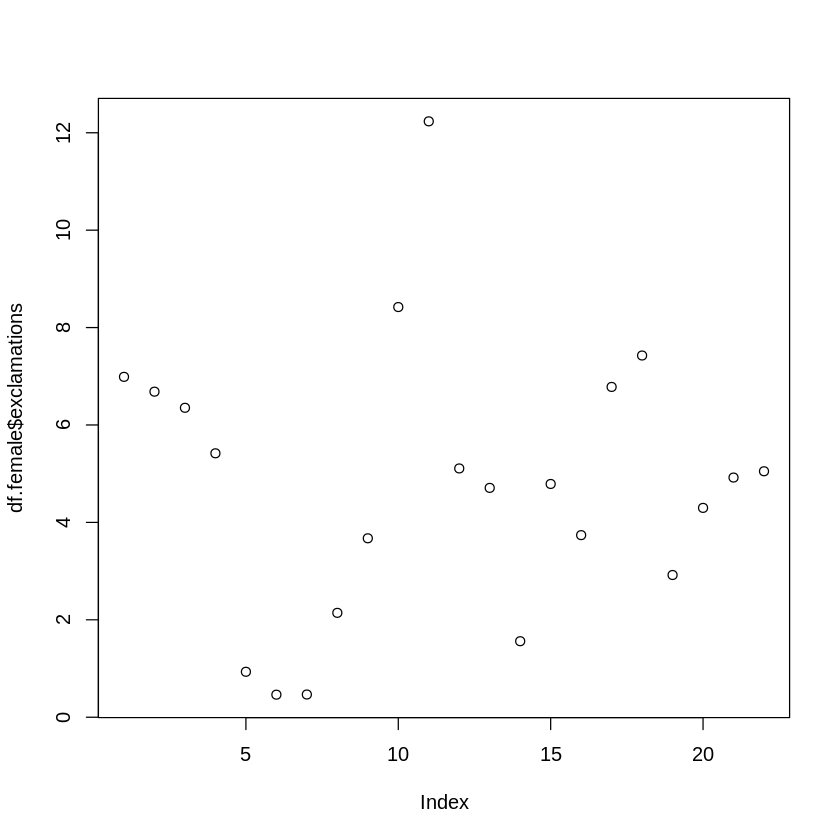


	Wilcoxon rank sum exact test

data:  df.female$exclamations and df.male$exclamations
W = 173, p-value = 0.1084
alternative hypothesis: true location shift is not equal to 0


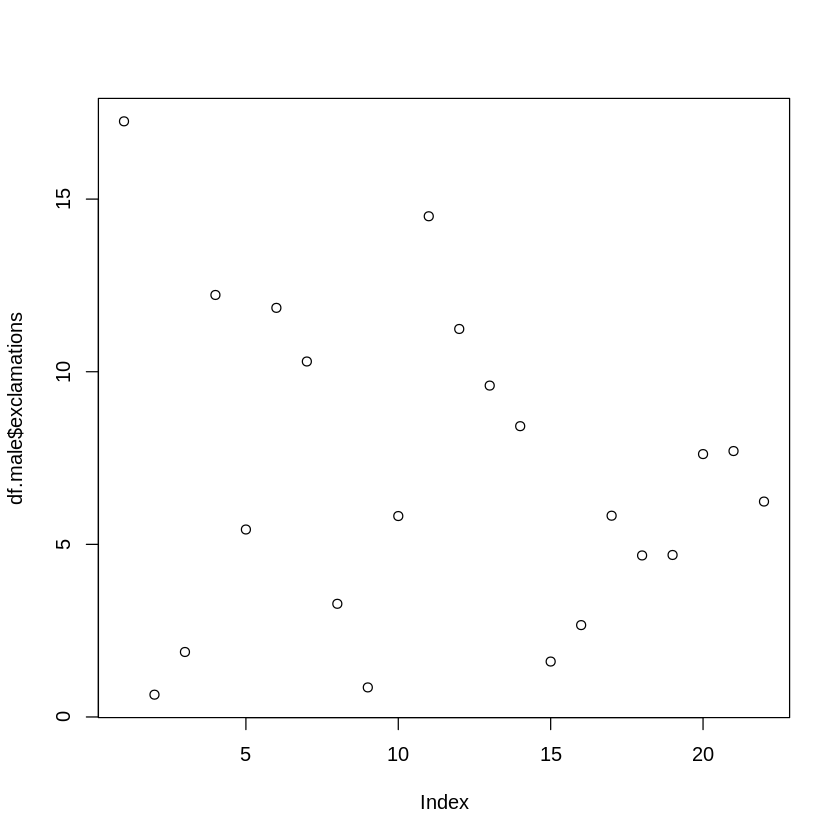

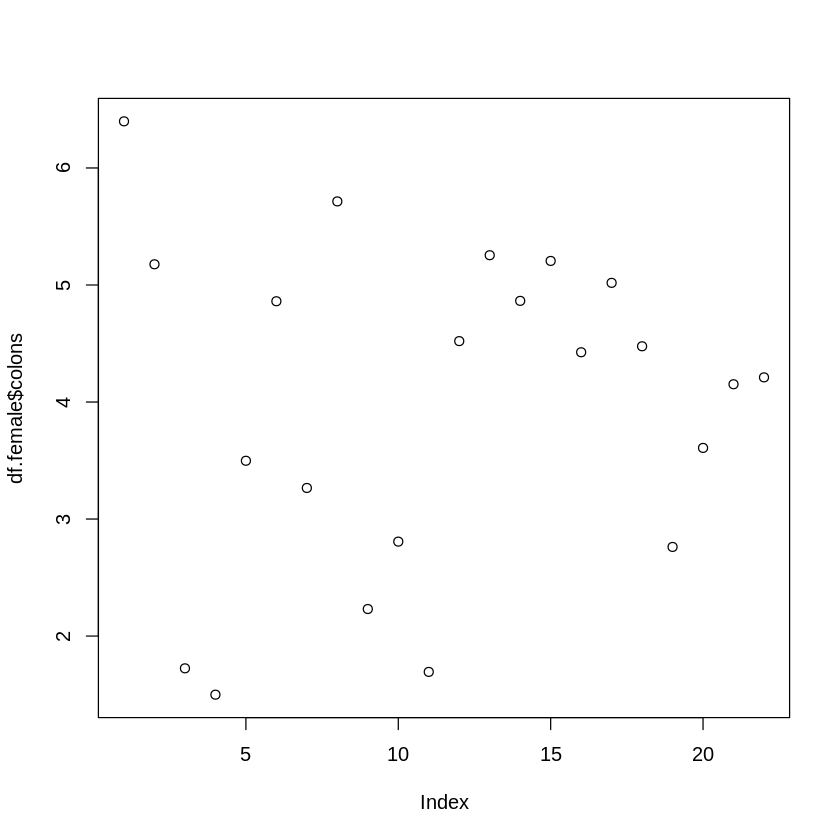


	Wilcoxon rank sum exact test

data:  df.female$colons and df.male$colons
W = 231, p-value = 0.8073
alternative hypothesis: true location shift is not equal to 0


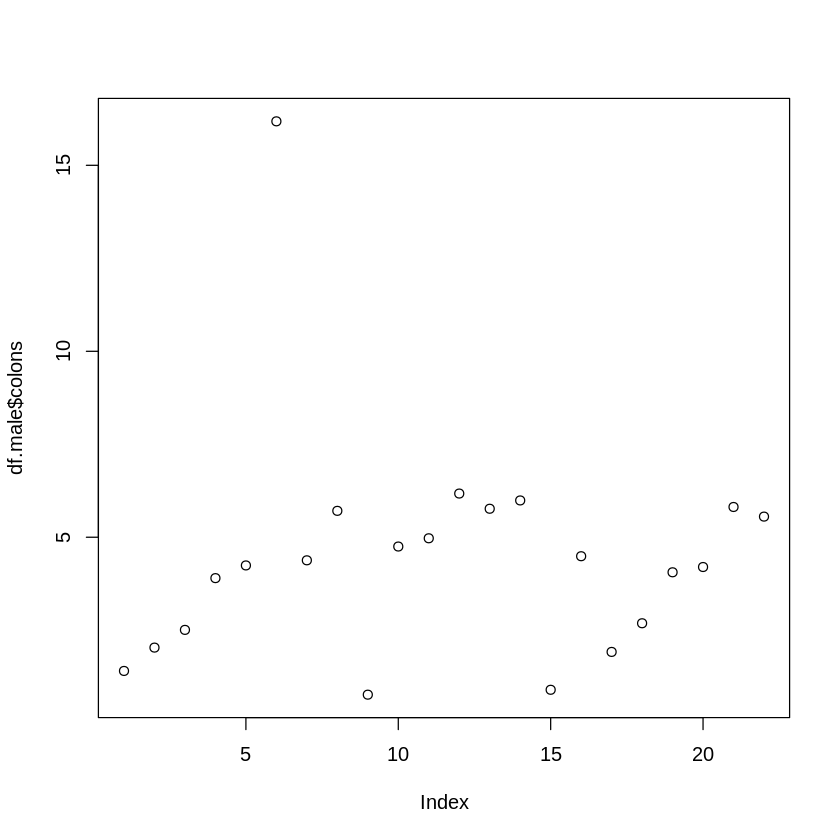

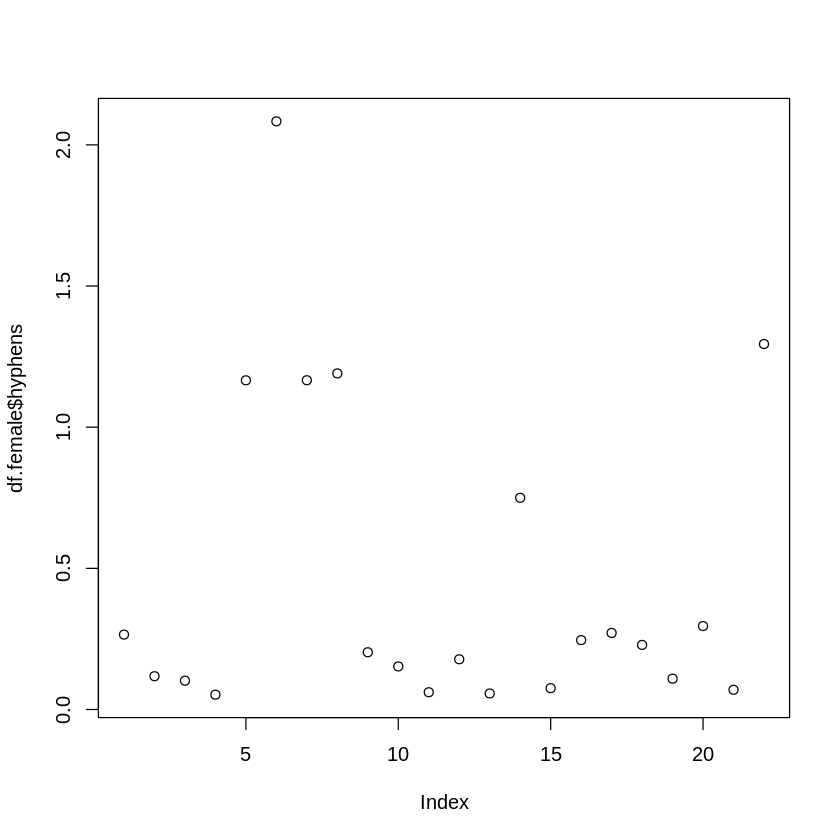


	Wilcoxon rank sum exact test

data:  df.female$hyphens and df.male$hyphens
W = 237, p-value = 0.9167
alternative hypothesis: true location shift is not equal to 0


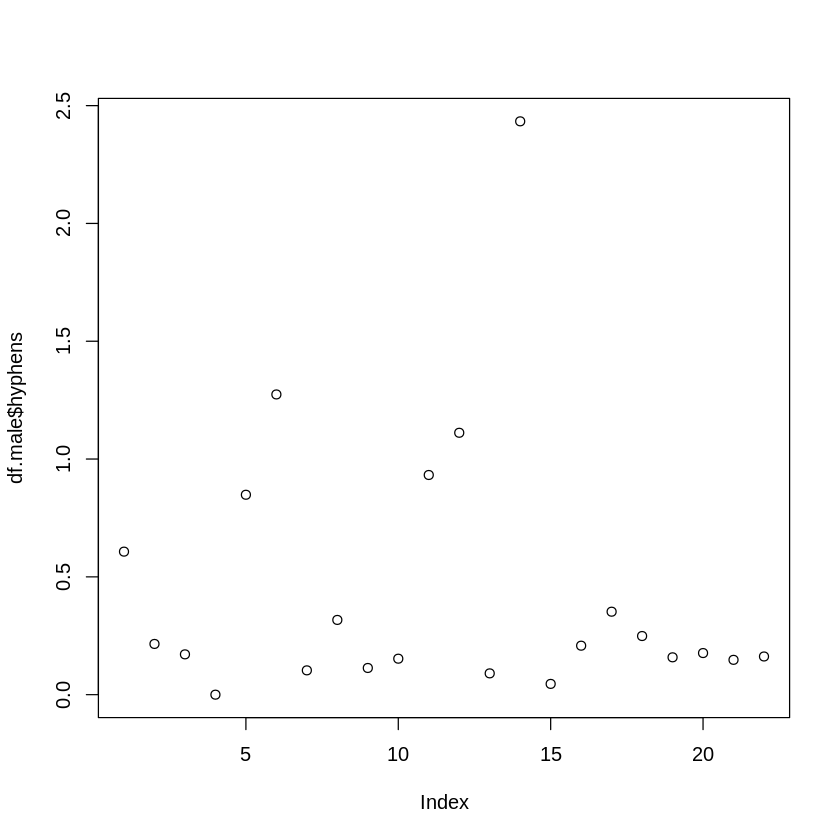

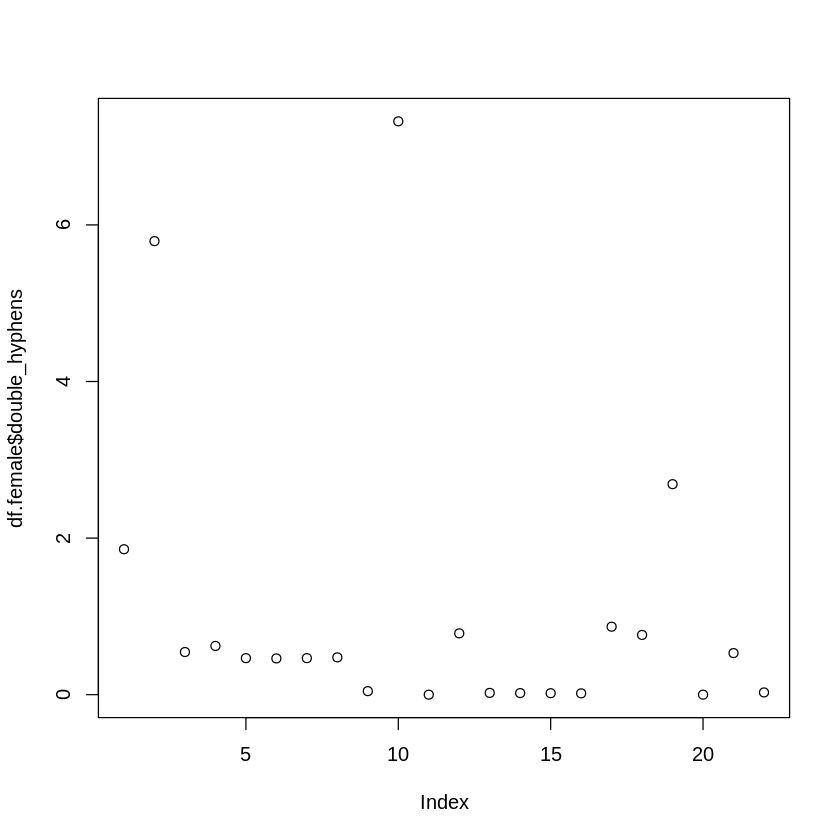

Warning message in wilcox.test.default(df.female$double_hyphens, df.male$double_hyphens):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  df.female$double_hyphens and df.male$double_hyphens
W = 137, p-value = 0.01417
alternative hypothesis: true location shift is not equal to 0


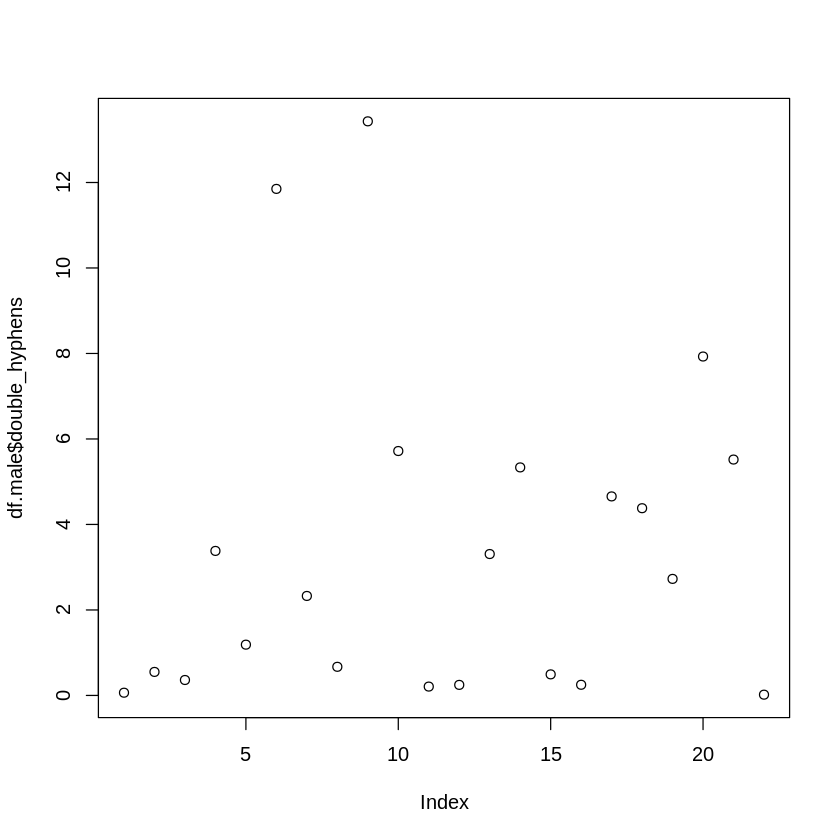

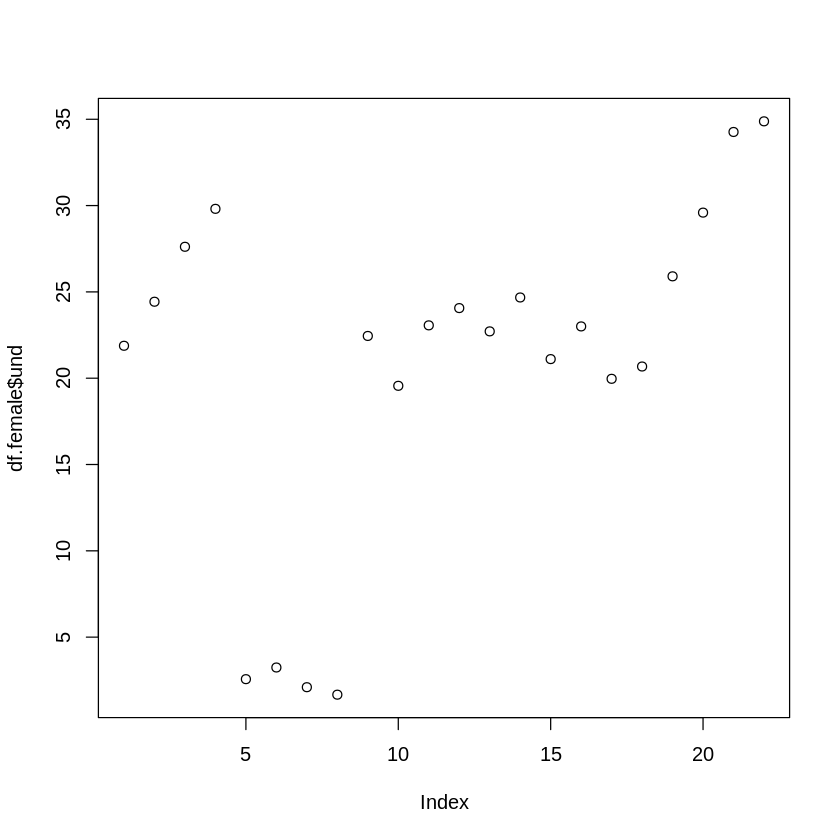


	Wilcoxon rank sum exact test

data:  df.female$und and df.male$und
W = 229, p-value = 0.7715
alternative hypothesis: true location shift is not equal to 0


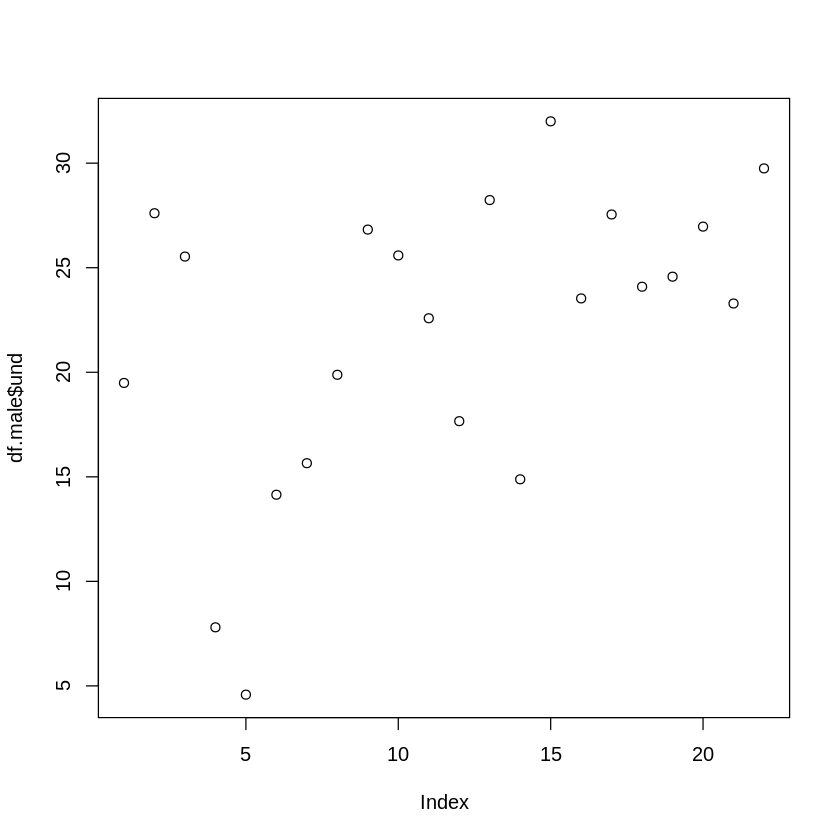

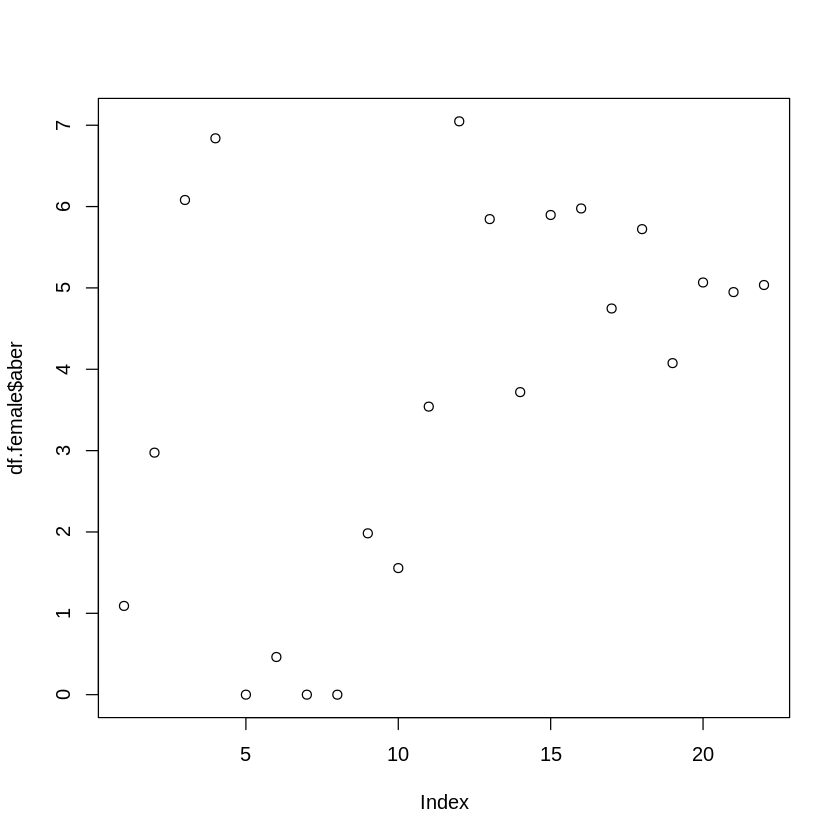

Warning message in wilcox.test.default(df.female$aber, df.male$aber):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  df.female$aber and df.male$aber
W = 294, p-value = 0.2267
alternative hypothesis: true location shift is not equal to 0


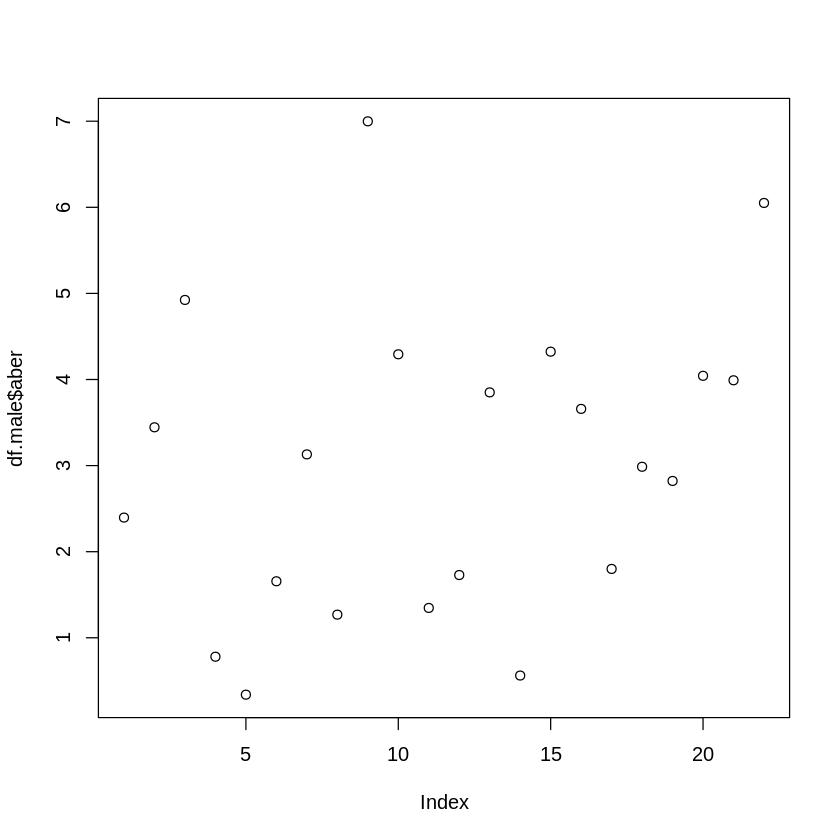

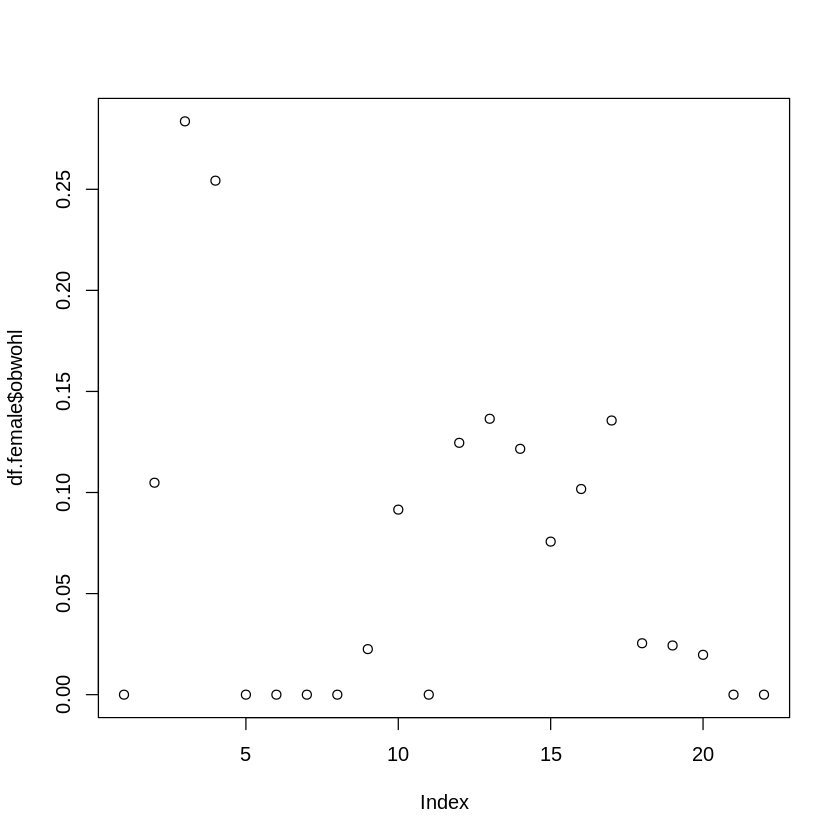

Warning message in wilcox.test.default(df.female$obwohl, df.male$obwohl):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  df.female$obwohl and df.male$obwohl
W = 292, p-value = 0.2185
alternative hypothesis: true location shift is not equal to 0


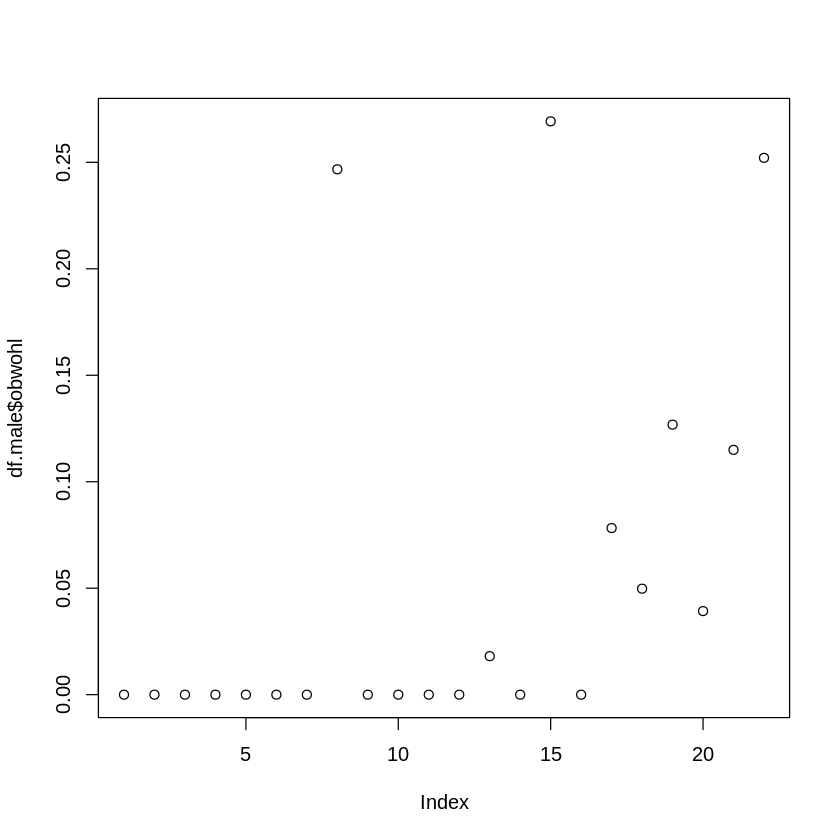

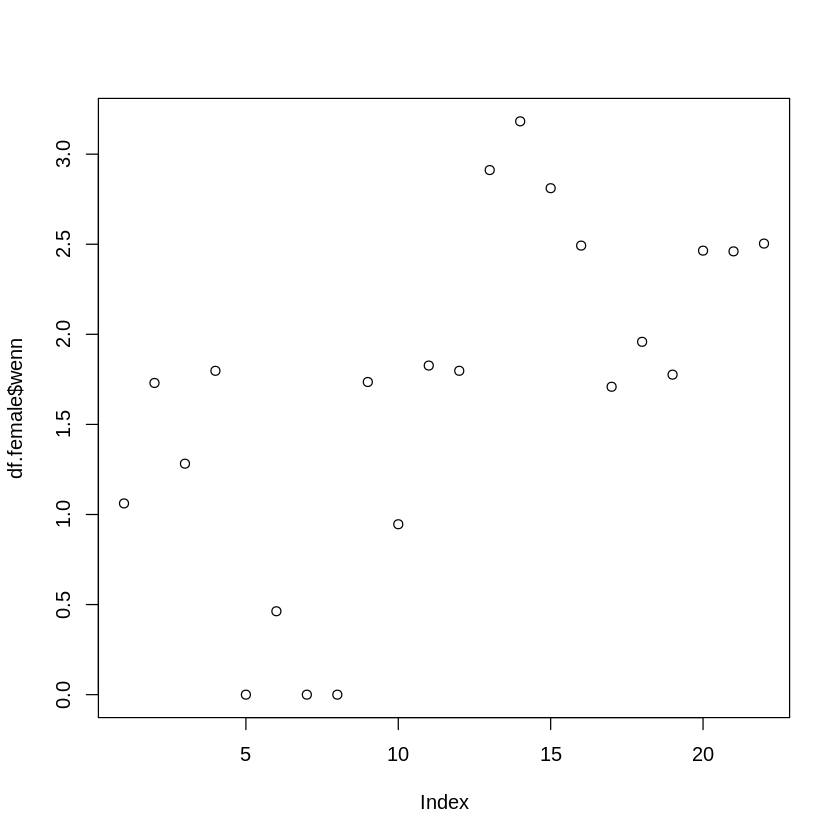

Warning message in wilcox.test.default(df.female$wenn, df.male$wenn):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  df.female$wenn and df.male$wenn
W = 300.5, p-value = 0.1729
alternative hypothesis: true location shift is not equal to 0


Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”


ERROR: ignored

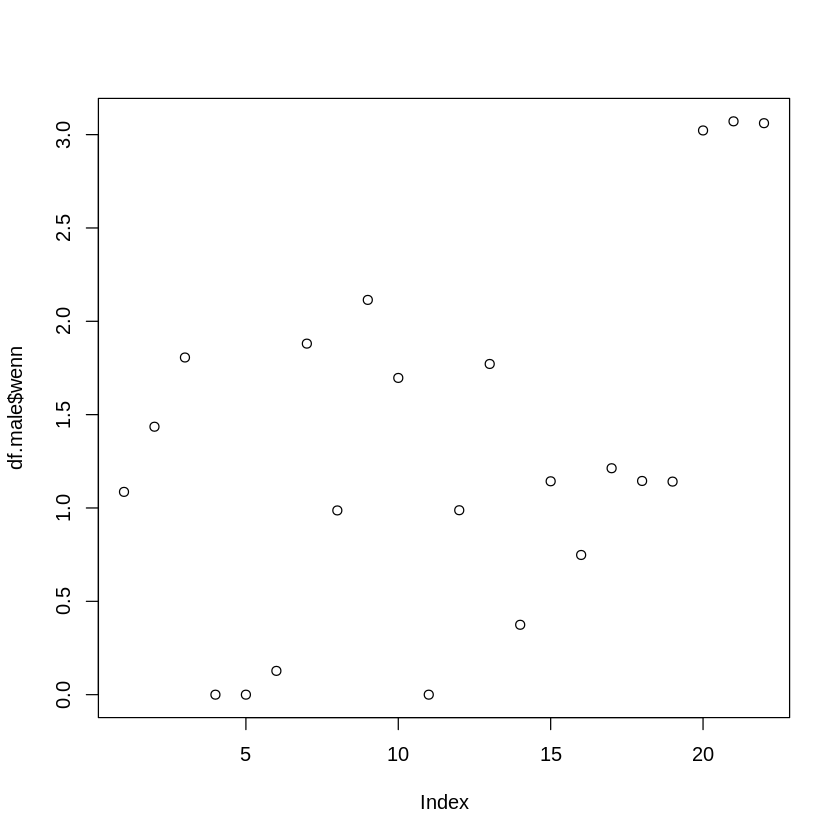

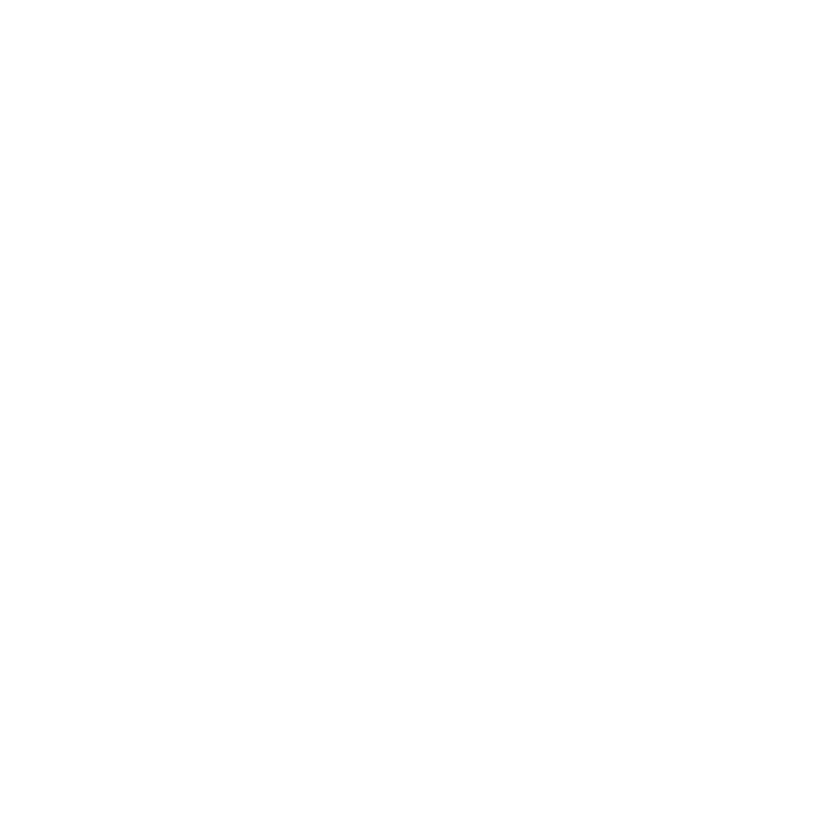

In [ ]:

plot(df.female$TTR)
plot(df.male$TTR)
wilcox.test(df.female$TTR, df.male$TTR)


plot(df.female$mean_p_len)
plot(df.male$mean_p_len)
wilcox.test(df.female$mean_p_len, df.male$mean_p_len)

plot(df.female$mean_sent_len)
plot(df.male$mean_sent_len)
wilcox.test(df.female$mean_sent_len, df.male$mean_sent_len)

plot(df.female$mean_word_len)
plot(df.male$mean_word_len)
wilcox.test(df.female$mean_word_len, df.male$mean_word_len)


plot(df.female$std_sent_len)
plot(df.male$std_sent_len)
wilcox.test(df.female$std_sent_len, df.male$std_sent_len)

plot(df.female$doc_len)
plot(df.male$doc_len)
wilcox.test(df.female$doc_len, df.male$doc_len)

plot(df.female$commas)
plot(df.male$commas)
wilcox.test(df.female$commas, df.male$commas)

plot(df.female$semicolons)
plot(df.male$semicolons)
wilcox.test(df.female$semicolons, df.male$semicolons)

plot(df.female$quotations)
plot(df.male$quotations)
wilcox.test(df.female$quotations, df.male$quotations)

plot(df.female$exclamations)
plot(df.male$exclamations)
wilcox.test(df.female$exclamations, df.male$exclamations)

plot(df.female$colons)
plot(df.male$colons)
wilcox.test(df.female$colons, df.male$colons)

plot(df.female$hyphens)
plot(df.male$hyphens)
wilcox.test(df.female$hyphens, df.male$hyphens)

plot(df.female$double_hyphens)
plot(df.male$double_hyphens)
wilcox.test(df.female$double_hyphens, df.male$double_hyphens)

plot(df.female$und)
plot(df.male$und)
wilcox.test(df.female$und, df.male$und)

plot(df.female$aber)
plot(df.male$aber)
wilcox.test(df.female$aber, df.male$aber)

plot(df.female$obwohl)
plot(df.male$obwohl)
wilcox.test(df.female$obwohl, df.male$obwohl)

plot(df.female$wenn)
plot(df.male$wenn)
wilcox.test(df.female$wenn, df.male$wenn)

plot(df.female$daß)
plot(df.male$daß)
wilcox.test(df.female$daß, df.male$daß)

plot(df.female$mehr)
plot(df.male$mehr)
wilcox.test(df.female$mehr, df.male$mehr)

plot(df.female$sagen)
plot(df.male$sagen)
wilcox.test(df.female$sagen, df.male$sagen)

plot(df.female$rufen)
plot(df.male$rufen)
wilcox.test(df.female$rufen, df.male$rufen)

plot(df.female$flüstern)
plot(df.male$flüstern)
wilcox.test(df.female$flüstern, df.male$flüstern)

plot(df.female$vielleicht)
plot(df.male$vielleicht)
wilcox.test(df.female$vielleicht, df.male$vielleicht)

plot(df.female$dies)
plot(df.male$dies)
wilcox.test(df.female$dies, df.male$dies)

plot(df.female$sehr)
plot(df.male$sehr)
wilcox.test(df.female$sehr, df.male$sehr)

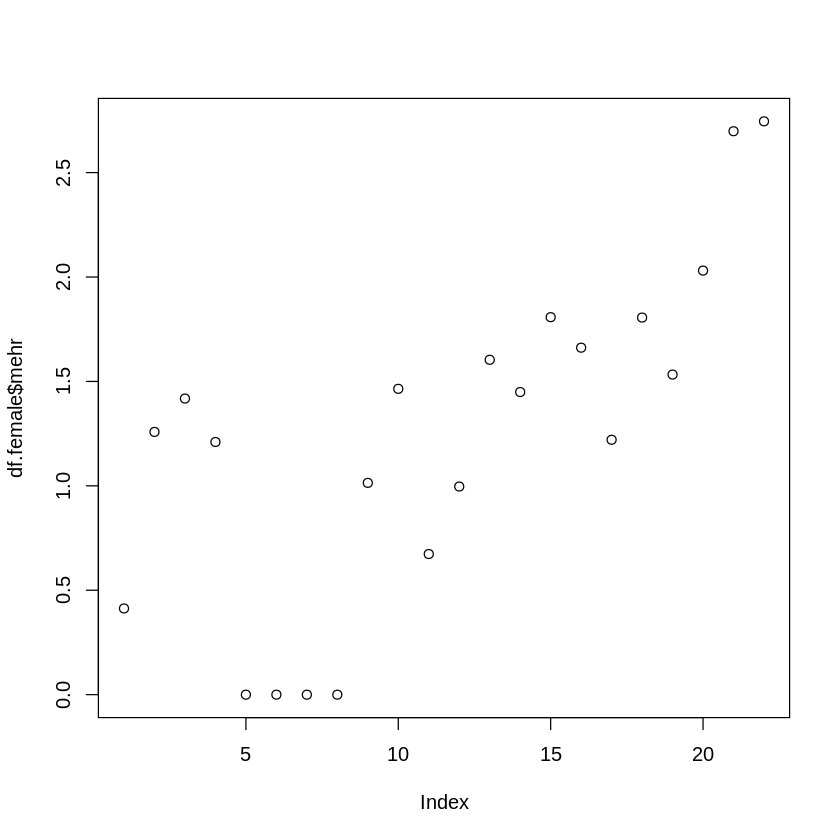

Warning message in wilcox.test.default(df.female$mehr, df.male$mehr):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  df.female$mehr and df.male$mehr
W = 335, p-value = 0.02971
alternative hypothesis: true location shift is not equal to 0


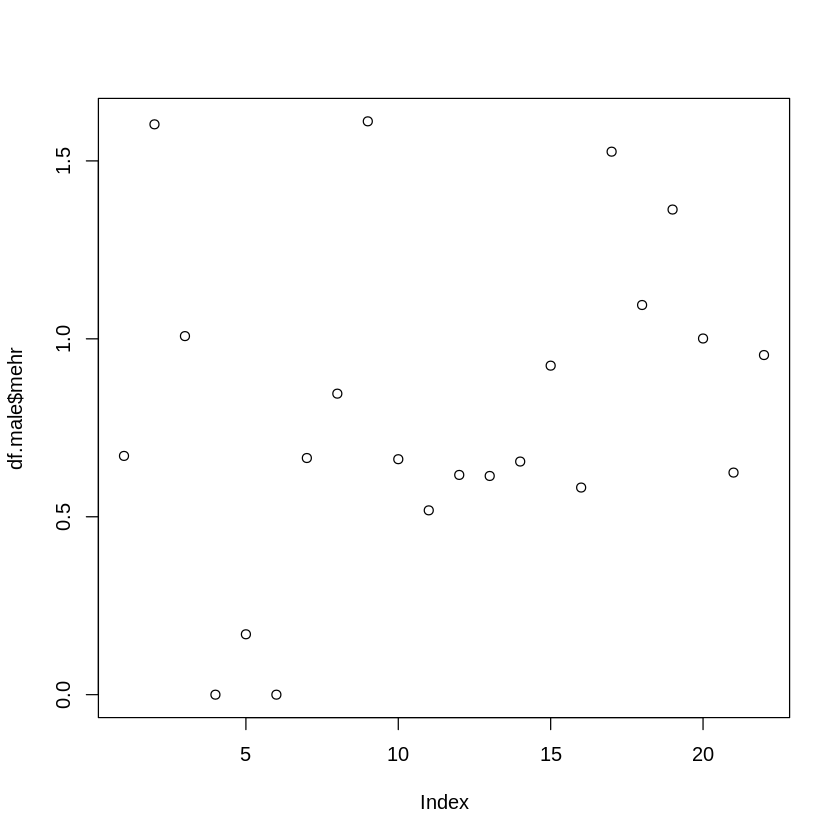

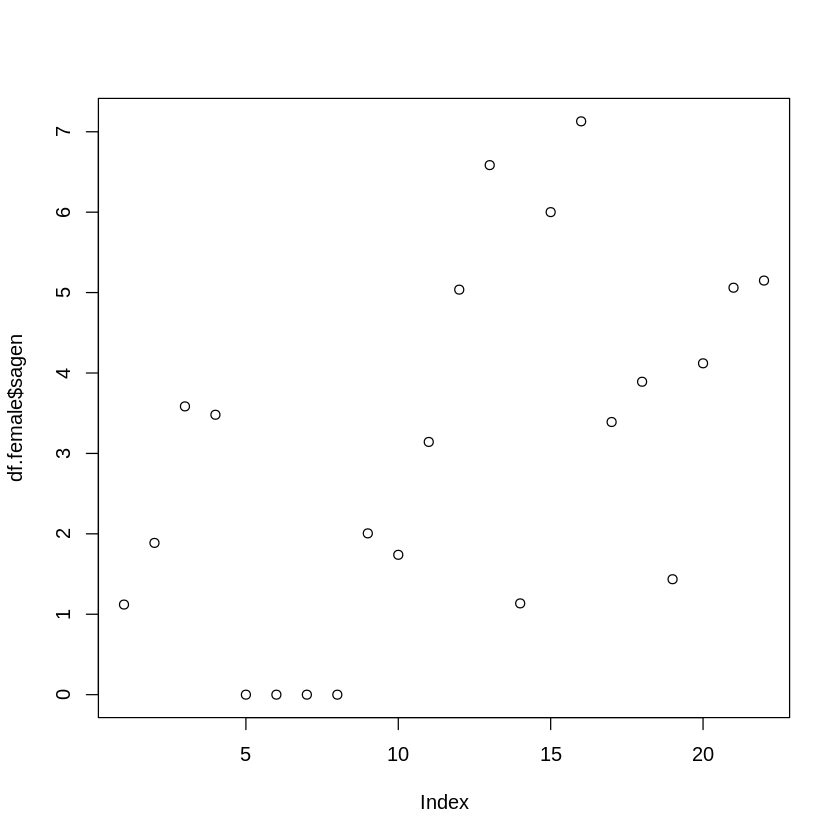

Warning message in wilcox.test.default(df.female$sagen, df.male$sagen):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  df.female$sagen and df.male$sagen
W = 294, p-value = 0.2262
alternative hypothesis: true location shift is not equal to 0


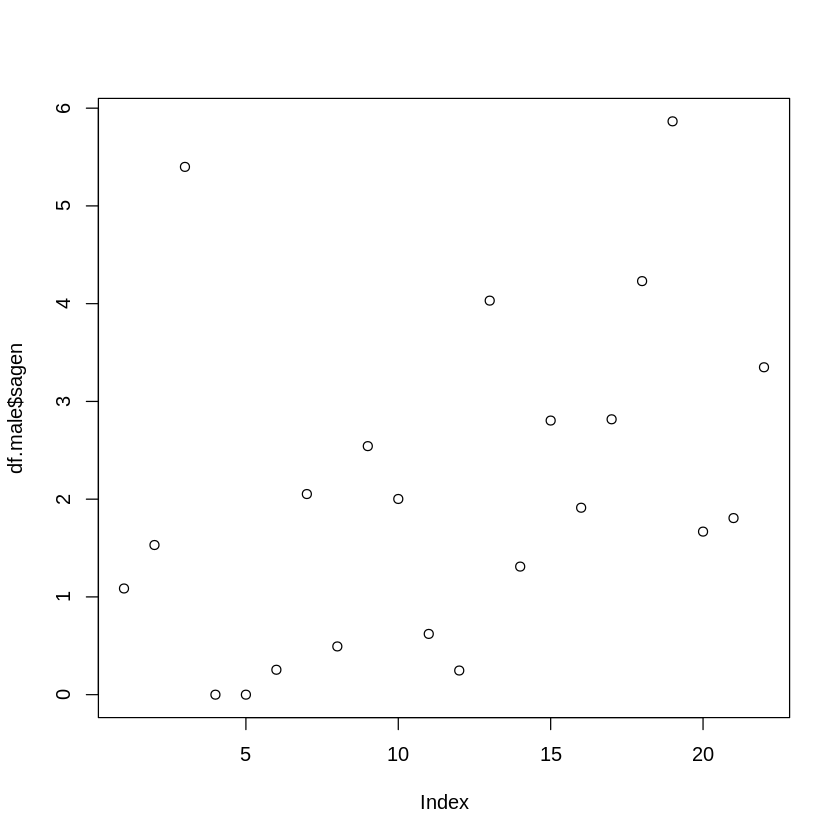

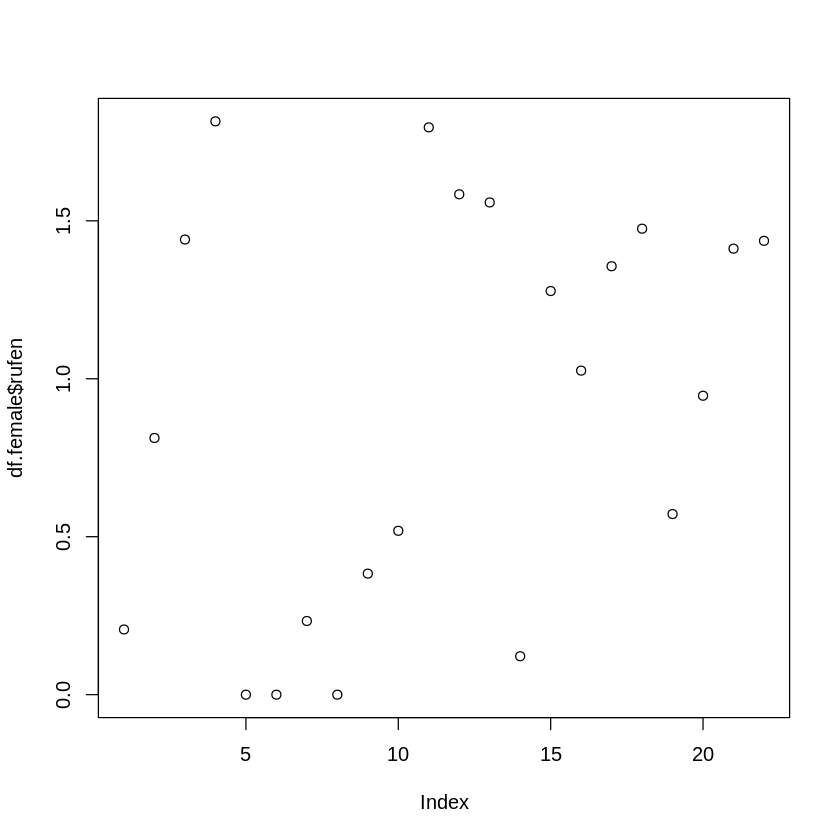

Warning message in wilcox.test.default(df.female$rufen, df.male$rufen):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  df.female$rufen and df.male$rufen
W = 278.5, p-value = 0.3979
alternative hypothesis: true location shift is not equal to 0


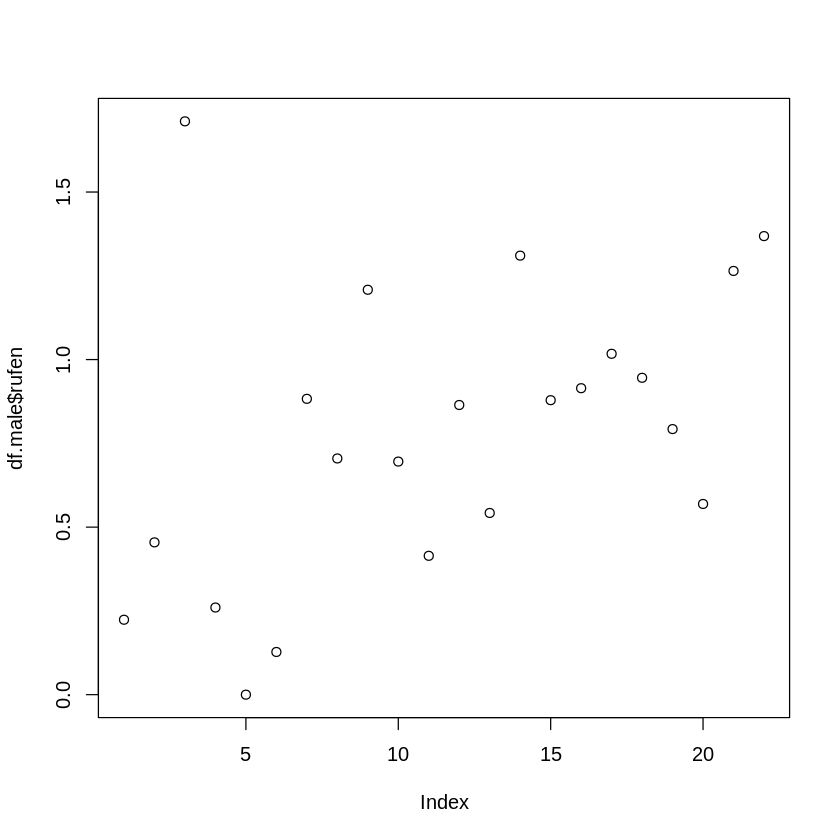

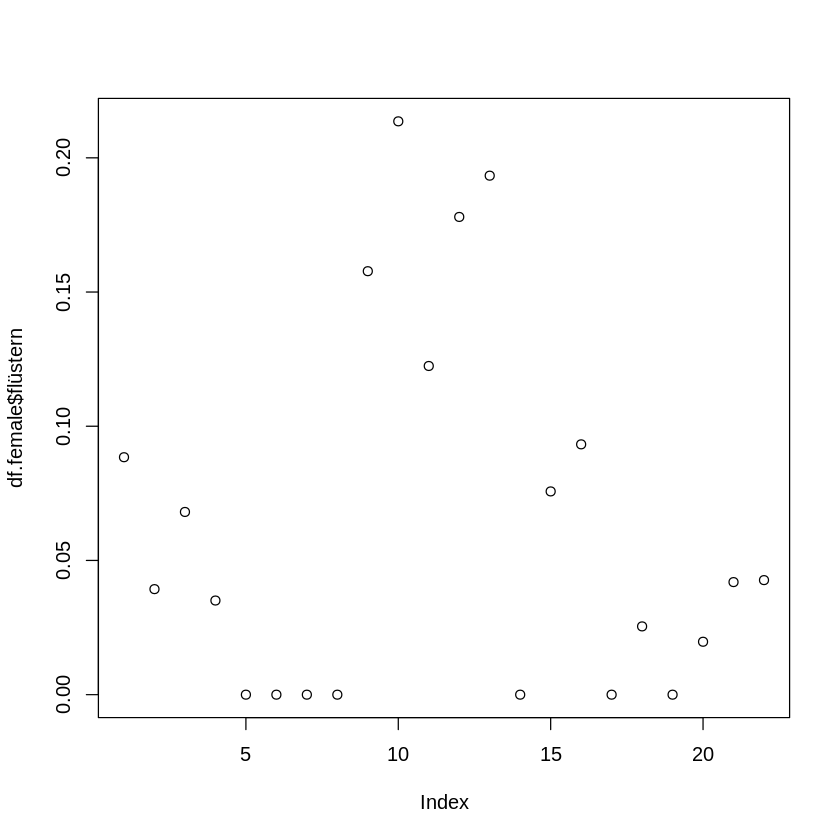

Warning message in wilcox.test.default(df.female$flüstern, df.male$flüstern):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  df.female$flüstern and df.male$flüstern
W = 264.5, p-value = 0.5927
alternative hypothesis: true location shift is not equal to 0


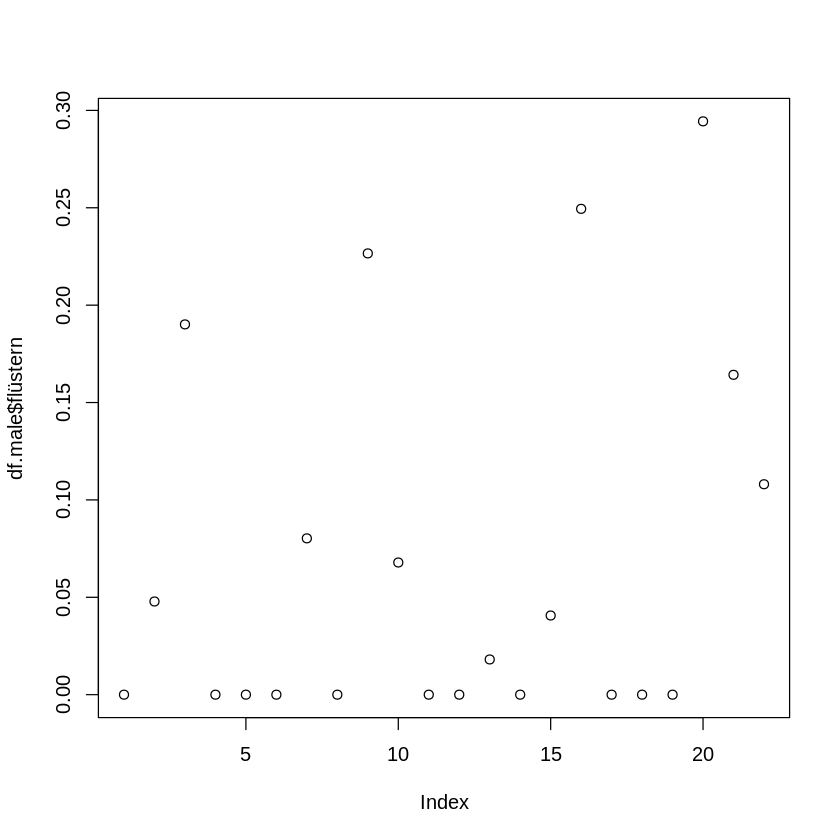

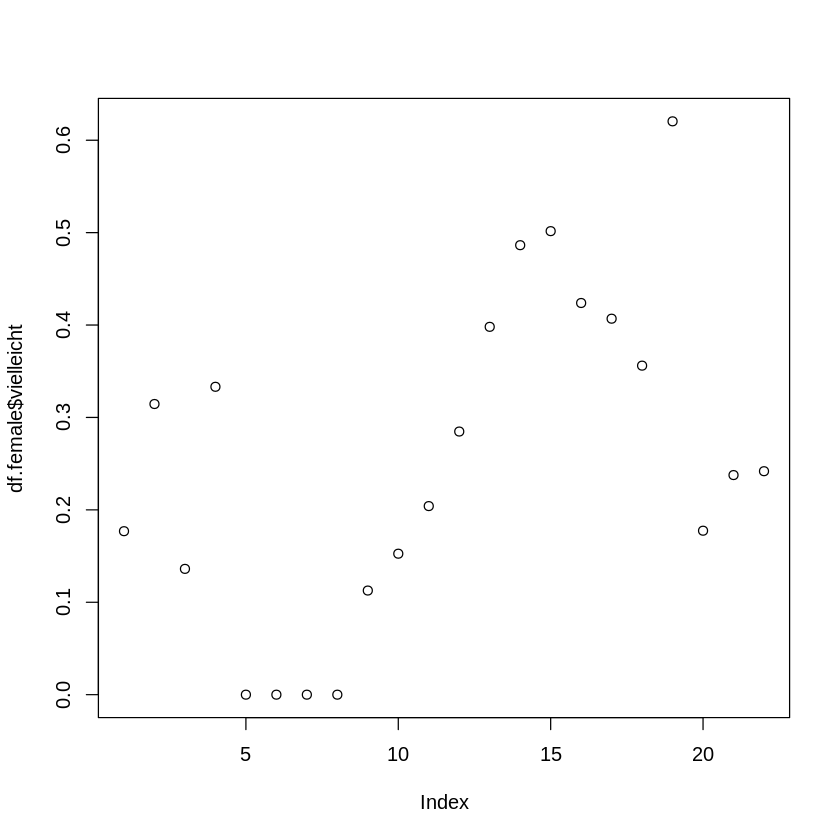

Warning message in wilcox.test.default(df.female$vielleicht, df.male$vielleicht):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  df.female$vielleicht and df.male$vielleicht
W = 300, p-value = 0.1758
alternative hypothesis: true location shift is not equal to 0


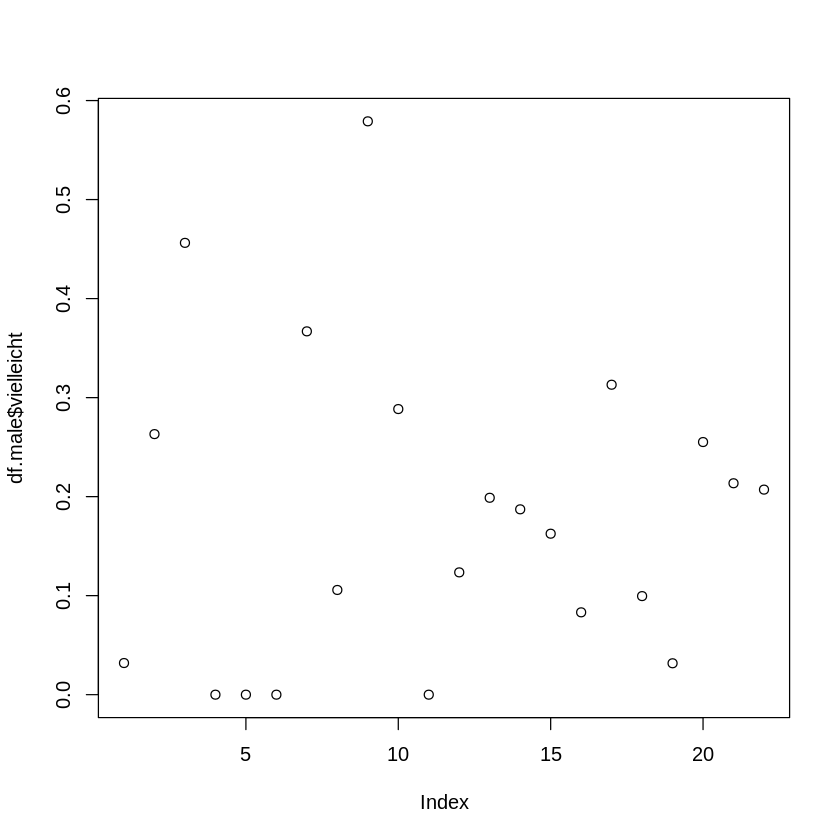

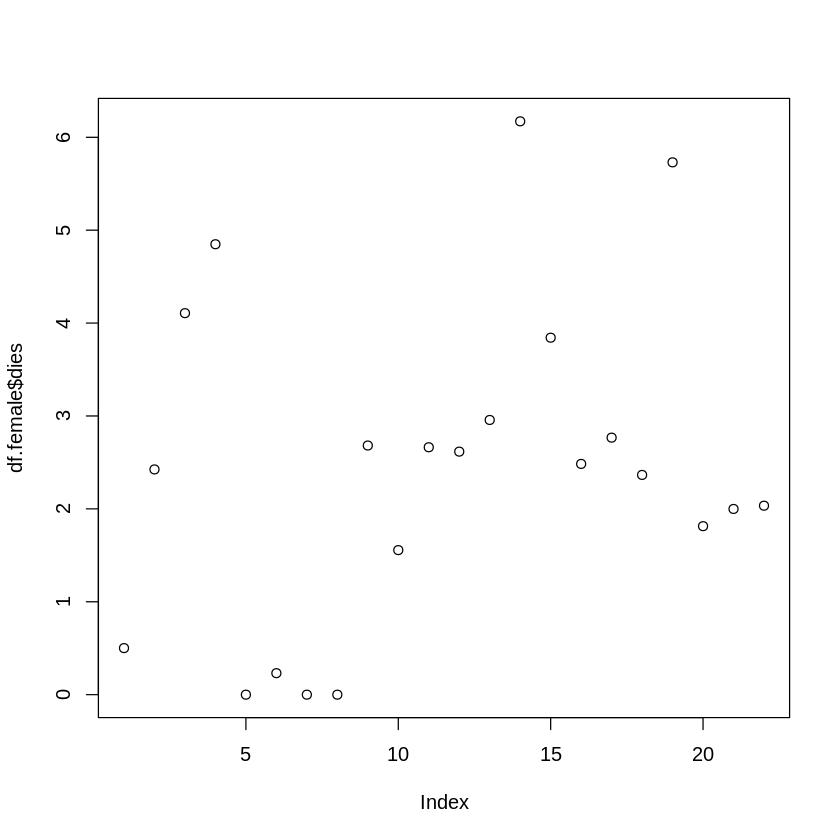

Warning message in wilcox.test.default(df.female$dies, df.male$dies):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  df.female$dies and df.male$dies
W = 232, p-value = 0.8235
alternative hypothesis: true location shift is not equal to 0


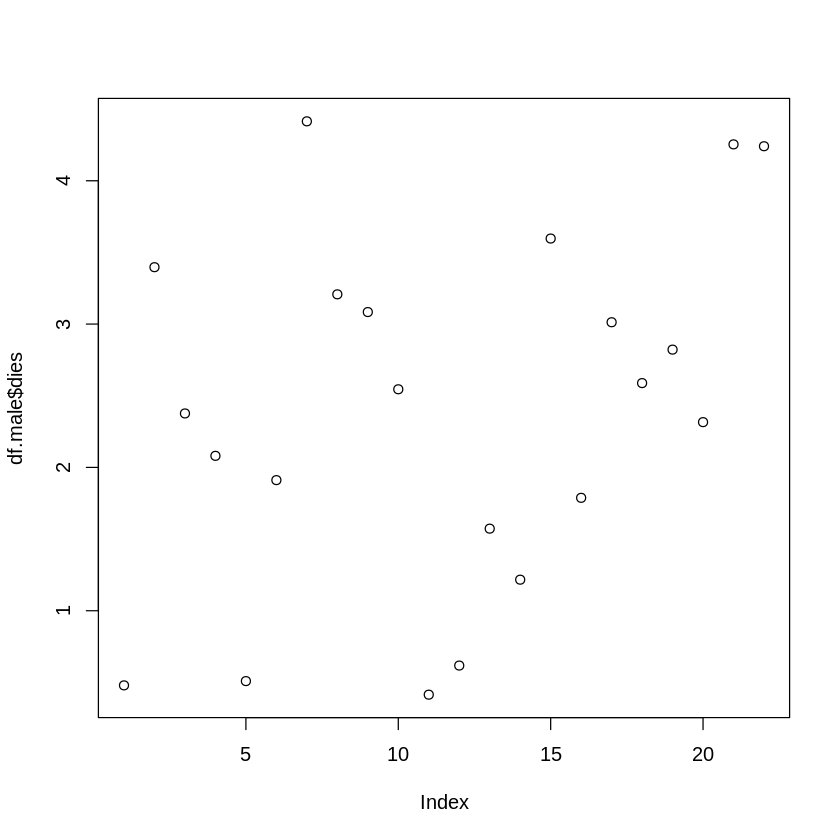

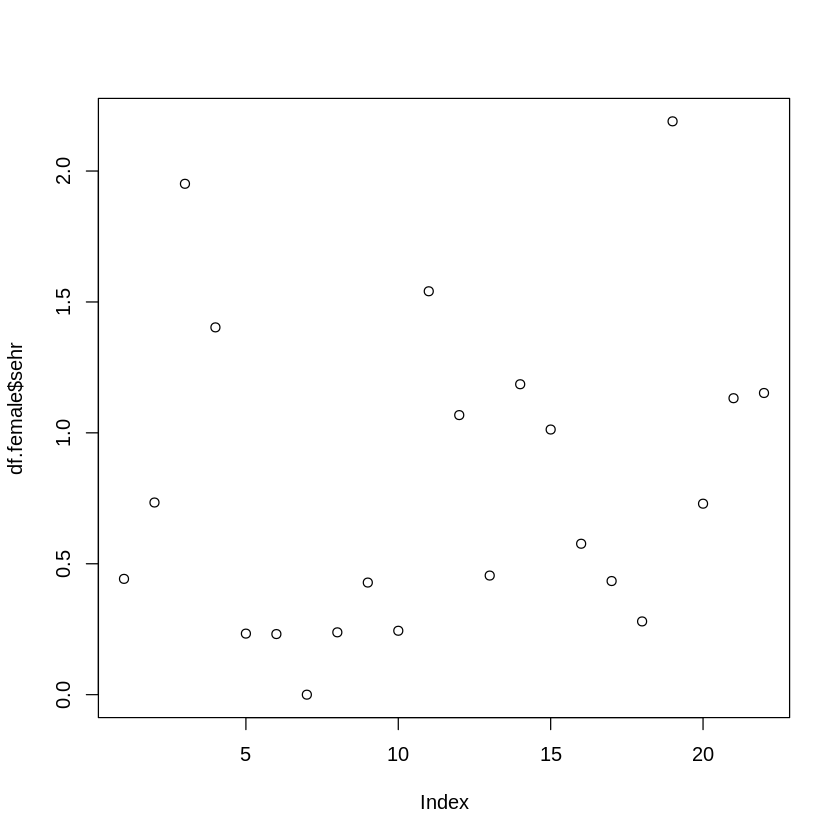

Warning message in wilcox.test.default(df.female$sehr, df.male$sehr):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  df.female$sehr and df.male$sehr
W = 198.5, p-value = 0.3128
alternative hypothesis: true location shift is not equal to 0


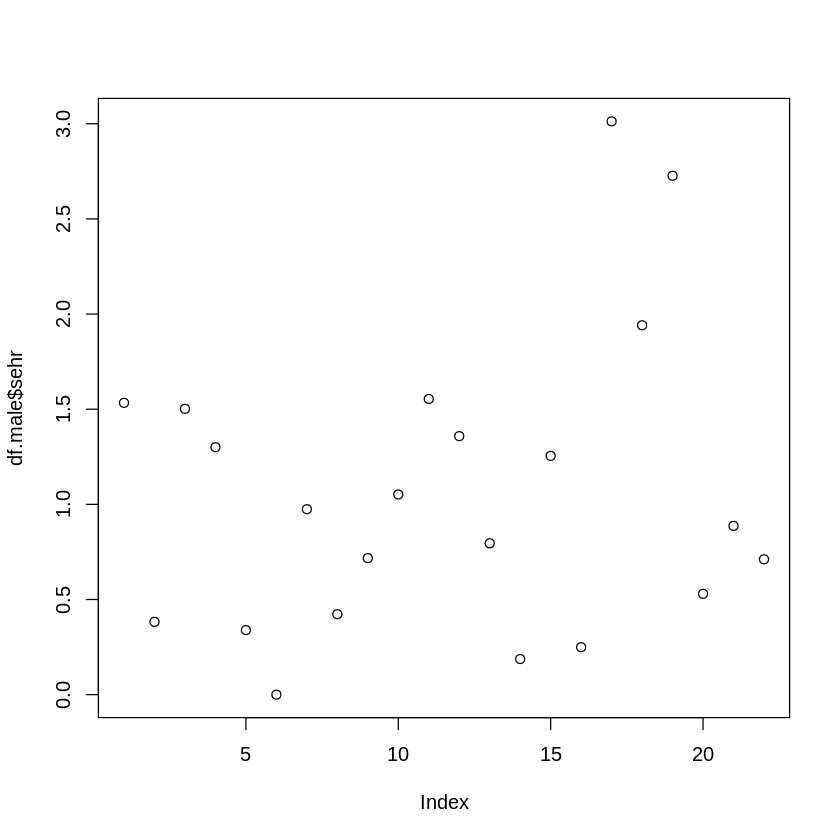

In [ ]:
plot(df.female$mehr)
plot(df.male$mehr)
wilcox.test(df.female$mehr, df.male$mehr)

plot(df.female$sagen)
plot(df.male$sagen)
wilcox.test(df.female$sagen, df.male$sagen)

plot(df.female$rufen)
plot(df.male$rufen)
wilcox.test(df.female$rufen, df.male$rufen)

plot(df.female$flüstern)
plot(df.male$flüstern)
wilcox.test(df.female$flüstern, df.male$flüstern)

plot(df.female$vielleicht)
plot(df.male$vielleicht)
wilcox.test(df.female$vielleicht, df.male$vielleicht)

plot(df.female$dies)
plot(df.male$dies)
wilcox.test(df.female$dies, df.male$dies)

plot(df.female$sehr)
plot(df.male$sehr)
wilcox.test(df.female$sehr, df.male$sehr)

In [ ]:
summary(df.male$dass)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1274  1.1848  2.7719  2.9555  4.6094  5.8198 

Assessing whether the difference in *mehr* is indeed in the direction we interpret from the graph, i.e. that the female data shows more frequent instances of *mehr* than the male one:

In [ ]:
wilcox.test(df.female$mehr, df.male$mehr, 'greater')

Warning message in wilcox.test.default(df.female$mehr, df.male$mehr, "greater"):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  df.female$mehr and df.male$mehr
W = 335, p-value = 0.01486
alternative hypothesis: true location shift is greater than 0


## Visualizing how our data is spread out: boxplots

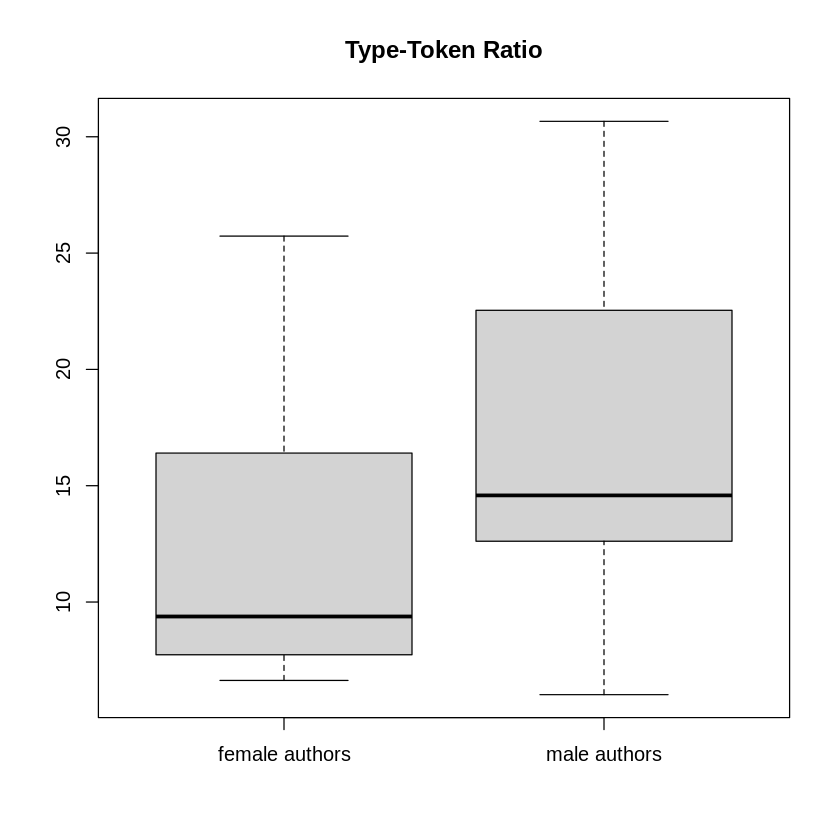

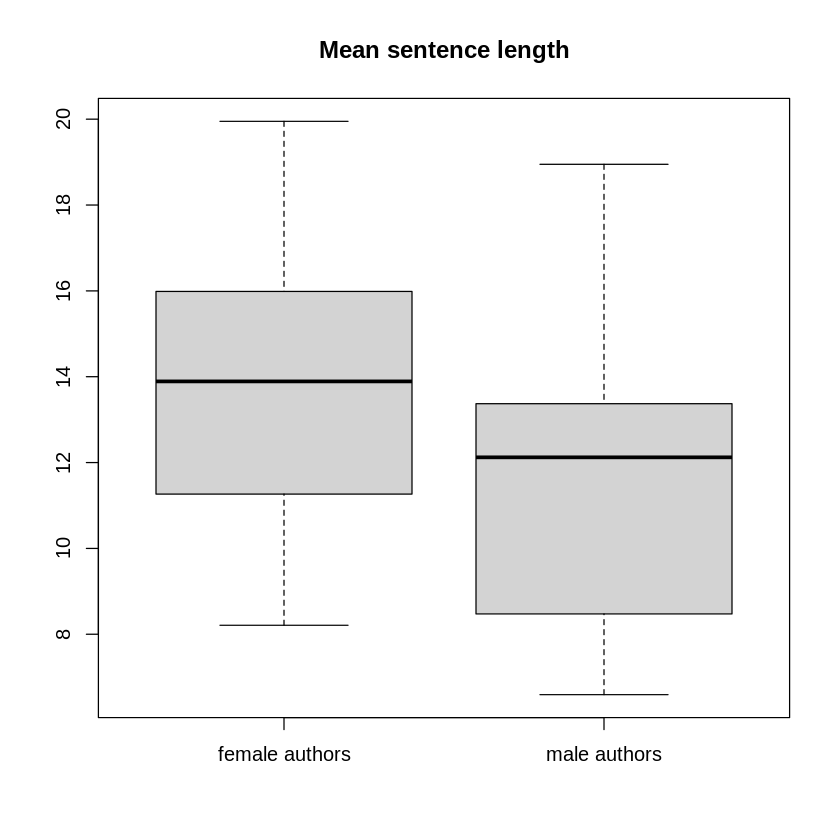

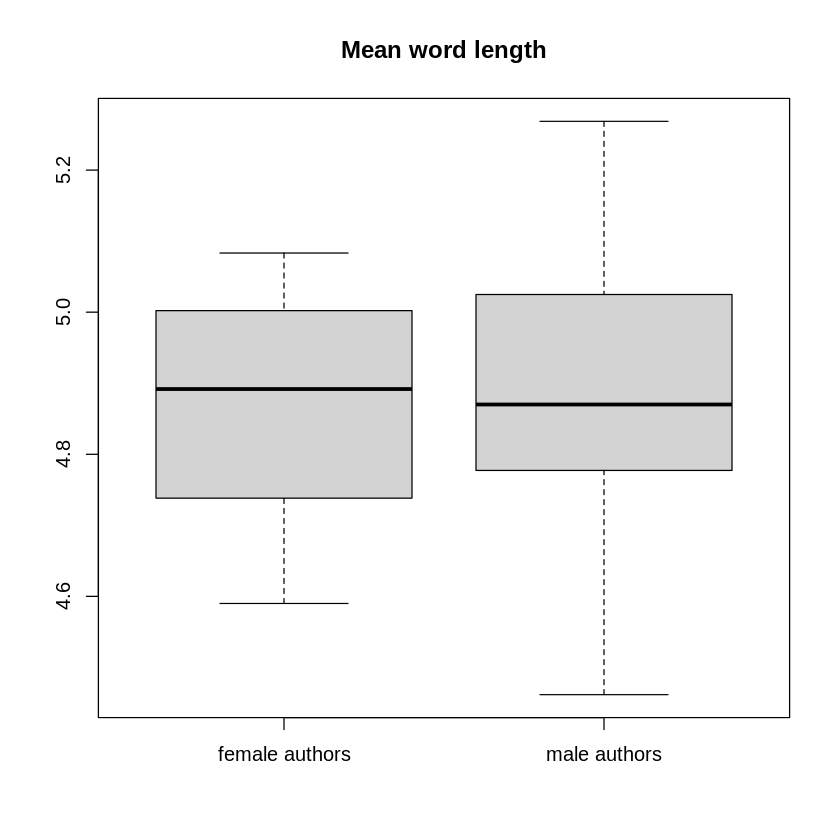

In [ ]:
boxplot(df.female$TTR, df.male$TTR, names=c('female authors', 'male authors'), main='Type-Token Ratio')
boxplot(df.female$mean_sent_len, df.male$mean_sent_len, names=c('female authors', 'male authors'), main='Mean sentence length')
boxplot(df.female$mean_word_len, df.male$mean_word_len, names=c('female authors', 'male authors'), main='Mean word length')

## Prediction/relationship analysis of the significant variables
In the following cells, we will look at the relationship between our categorical variable ``gender`` and the features where we found a significant difference between the genders. We now want to see whether those features are indeed predictive of the gender of the author, this as an indication of a correlation between these two variables.

We first add a categorical variable to each dataset to keep the gender difference:

In [ ]:
df.female$gender <- as.factor('female')

In [ ]:
df.male$gender <- as.factor('male')

....and then merge the two dataframes into one:

In [ ]:
full <- rbind(df.female, df.male)

We import an additional library for visualizations

In [ ]:
library(ggplot2)


And fit a logistic regression model where ``gender`` is predicted based on the ``TTR``. 

In [ ]:
mylogit <- glm(gender ~ TTR, data = full, family = "binomial")

In order to interpret the model, we need to know which label (``male`` or ``female`` is used as a reference by the model. This is by default the first variable listed under levels when we call the vector:

In [ ]:
full$gender

[1] female female female female female female female female female female
[11] female female female female female female female female female female
[21] female female male   male   male   male   male   male   male   male  
[31] male   male   male   male   male   male   male   male   male   male  
[41] male   male   male   male  
Levels: female male

Our reference is therefore ``female``. Everything the model says will be in reference to that label.

In [ ]:
summary(mylogit)


Call:
glm(formula = gender ~ TTR, family = "binomial", data = full)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6114  -0.9952  -0.1232   1.1698   1.4962  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) -1.24416    0.77775  -1.600   0.1097  
TTR          0.08642    0.05026   1.719   0.0855 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 60.997  on 43  degrees of freedom
Residual deviance: 57.757  on 42  degrees of freedom
AIC: 61.757

Number of Fisher Scoring iterations: 4


A deeper explanation of the results can be done following Mike's notebooks or with the explanation [here](https://stats.oarc.ucla.edu/r/dae/logit-regression/).



In [ ]:
mylogit2 <- glm(gender ~ mean_sent_len, data = full, family = "binomial")

In [ ]:
mylogit2


Call:  glm(formula = gender ~ mean_sent_len, family = "binomial", data = full)

Coefficients:
  (Intercept)  mean_sent_len  
       1.9280        -0.1537  

Degrees of Freedom: 43 Total (i.e. Null);  42 Residual
Null Deviance:	    61 
Residual Deviance: 57.92 	AIC: 61.92

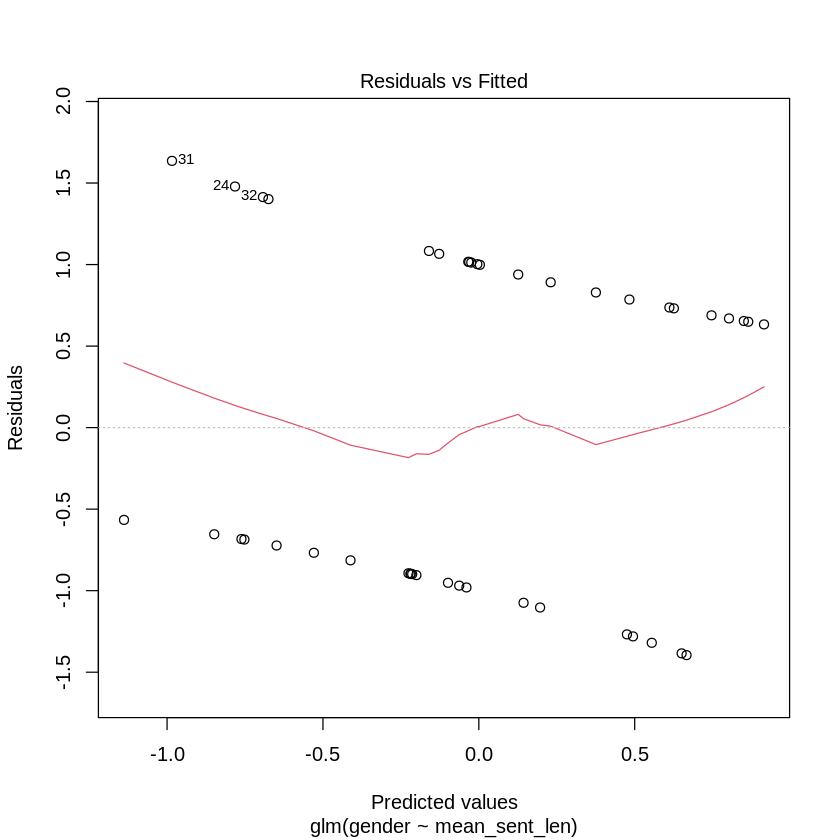

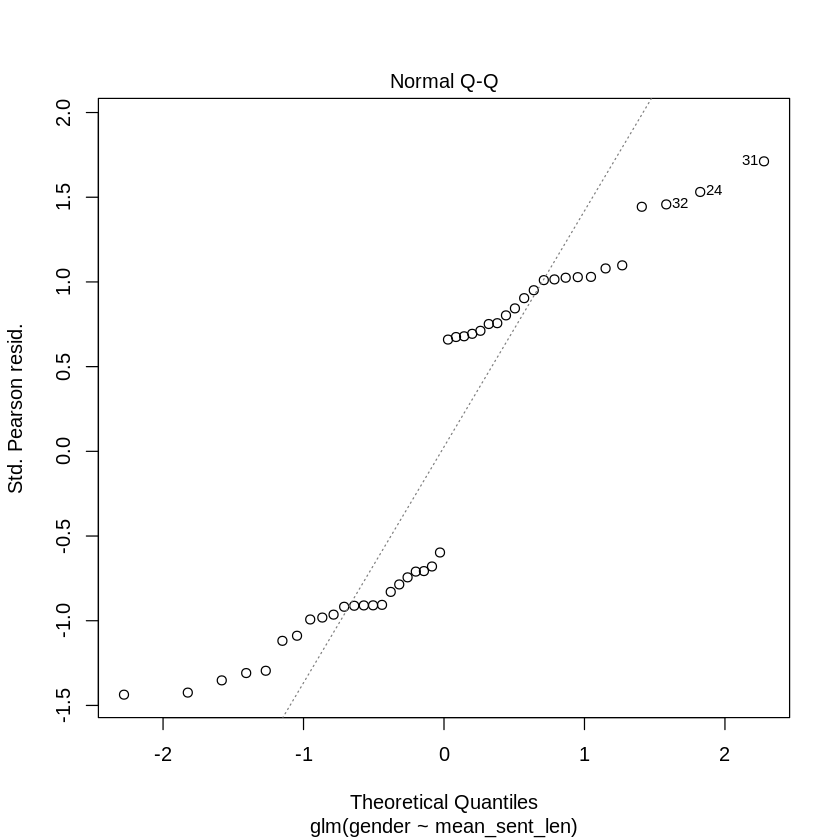

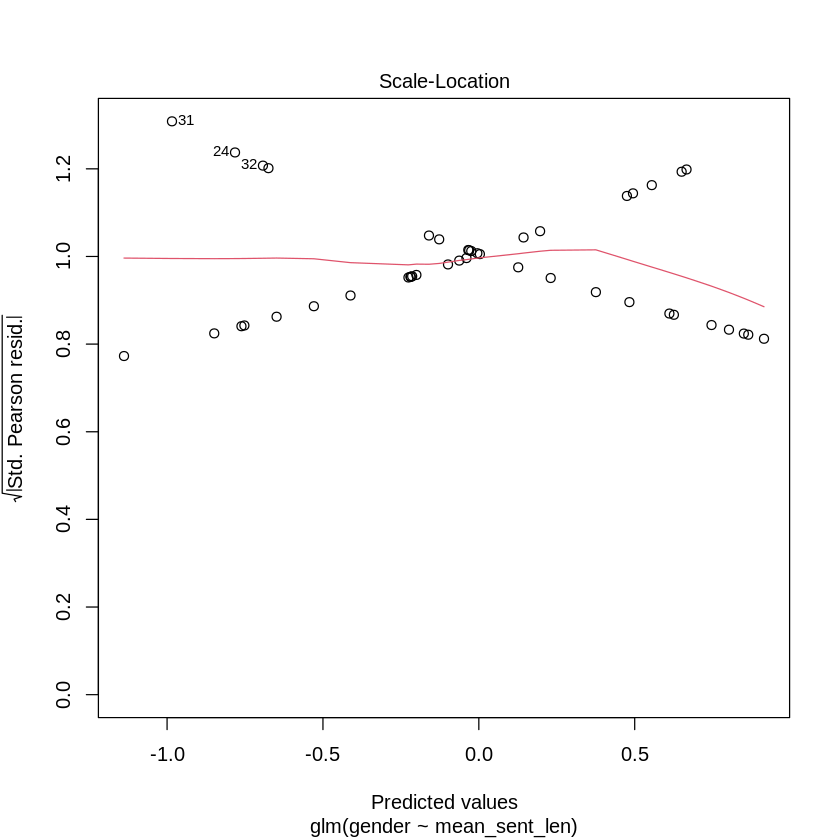

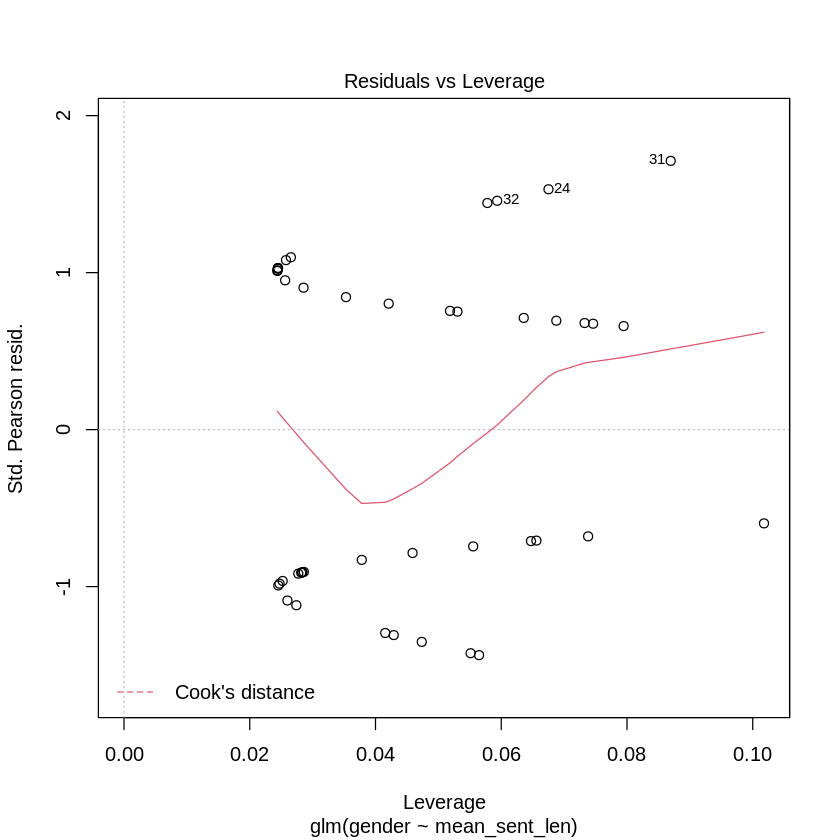

In [ ]:
plot(mylogit2)